## kaggle : All Lending Club loan data
- 세계 최대 P2P 대출 플랫폼인 LendingClub의 대출 신청자 정보
- 목표: 과거 대출 기록(채무 불이행 여부 포함)을 기반으로 채무 불이행 가능성이 있는 고객을 식별하여 회사의 신용 손실을 최소화
- 데이터셋: 대출 금액, 이자율, 소득, 주택 소유 상태 등 신청자의 다양한 재무 및 개인 정보가 포함
- 컬럼 151개, 데이터(행) 2,260,701개
- https://www.kaggle.com/datasets/wordsforthewise/lending-club/data

LendingClub: 도시 고객들에게 다양한 유형의 대출을 전문적으로 제공하는 회사
- 은행 및 금융 서비스 분야의 위험 분석(Risk Analytics)
- 고객에게 대출금을 빌려주는 동안 손실 위험을 최소화하는 데 데이터를 어떻게 사용할지가 중점


회사가 대출 신청을 받으면, 신청자의 프로필을 기반으로 대출 승인 여부를 결정
- 만약 신청자가 대출금을 상환할 가능성이 높다면, 대출을 승인하지 않는 것은 회사에 사업 기회 손실을 가져옴
- 만약 신청자가 대출금을 상환할 가능성이 낮다면(즉, 채무 불이행(부도) 가능성이 높다면), 대출을 승인하는 것은 회사에 재정적 손실을 초래 가능
<br>

데이터
- 과거 대출 신청자들에 대한 정보와 그들이 '채무 불이행(부도)'을 했는지 여부
- 목표: 어떤 사람이 채무 불이행할 가능성이 있는지를 나타내는 패턴을 식별하는 것
- -> 패턴을 활용: 대출 거부, 대출 금액 축소, (위험한 신청자에게) 더 높은 이자율로 대출해 주는 등의 조치 취함 등
<br>

개인이 대출을 신청할 때, 회사가 취할 수 있는 결정
1. 대출 승인 (Loan accepted) : 아래 3가지 시나리오 가능
- 완전히 상환됨 (Fully Paid): 신청자가 대출금(원금 및 이자)을 전액 상환
- 현재 상환 중 (Current): 신청자가 현재 할부금을 납부하고 있는 중이며, 대출 기간이 아직 끝나지 않음. 이들은 '채무 불이행자'로 분류되지 않음.
- 대손 처리됨 (Charged-off): 신청자가 장기간 제때 할부금을 납부하지 않아 채무 불이행(부도) 상태가 됨
2. 대출 거부 (Loan rejected)
- 회사가 대출을 거부한 경우(예: 신청자가 요구 사항을 충족하지 못함 등)
- 대출이 거부되었기 때문에 해당 신청자들과의 거래 내역이 회사에는 없으므로, 이 데이터는 회사에(그리고 이 데이터셋에도) 포함되어 있지 않음

🎯 비즈니스 목표 (Business Objectives)
- LendingClub은 개인 대출, 사업 대출, 의료 시술 자금 조달 등을 용이하게 하는 가장 큰 온라인 대출 시장입니다. 대출자들은 빠르고 간편한 온라인 인터페이스를 통해 더 낮은 이자율의 대출에 쉽게 접근할 수 있습니다.
- 대부분의 다른 대출 회사들과 마찬가지로, '위험한' 신청자들에게 대출을 제공하는 것이 가장 큰 재정적 손실(신용 손실)의 원인입니다. 신용 손실은 대출자가 빚진 돈을 갚기를 거부하거나 돈을 들고 도주했을 때 대출 기관이 잃는 돈의 양을 의미합니다. 다시 말해, 채무 불이행을 하는 대출자들이 대출 기관에게 가장 큰 손실을 입힙니다. 이 사례에서는 '대손 처리됨(charged-off)'으로 분류된 고객들이 '채무 불이행자(defaulters)'입니다.
- 만약 이러한 위험한 대출 신청자들을 식별할 수 있다면, 그러한 대출을 줄여 신용 손실액을 줄일 수 있습니다. EDA와 머신러닝을 사용하여 이러한 신청자들을 식별하는 것이 이 사례 연구의 목표입니다.
- 즉, 회사는 대출 채무 불이행의 주요 원인(또는 주요 변수)을 이해하고자 합니다. 이는 채무 불이행의 강력한 지표가 되는 변수들을 파악하는 것입니다. 회사는 이 지식을 대출 포트폴리오 및 위험 평가에 활용할 수 있습니다.

In [1]:
import pandas as pd

data = pd.read_csv('accepted_2007_to_2018Q4.csv', parse_dates=['issue_d'], date_format='%b-%y', low_memory=False)
df_c = data.copy()

data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [3]:
# 각 컬럼의 정보 추출
column_names = data.columns.tolist()  # 컬럼명 리스트
non_null_counts = data.count()        # 각 컬럼의 비결측 데이터 개수 (Series 형태)
data_types = data.dtypes              # 각 컬럼의 데이터 타입 (Series 형태)

# 정보를 DataFrame으로 결합하여 보기 좋게 출력
column_info = pd.DataFrame({
    '컬럼명': column_names,
    '데이터 개수 (결측치 제외)': [non_null_counts[col] for col in column_names], # Series에서 값을 가져옴
    '데이터 타입': [data_types[col] for col in column_names] # Series에서 값을 가져옴
})

# 이 정보를 CSV 파일로 저장
# index=False는 DataFrame의 인덱스를 CSV 파일에 저장하지 않도록 합니다.
column_info.to_csv('column_information.csv', index=False, encoding='utf-8-sig')

print("컬럼 정보가 'column_information.csv' 파일로 저장되었습니다.")

컬럼 정보가 'column_information.csv' 파일로 저장되었습니다.


In [4]:
import pandas as pd

missing_values = data.isna().sum()

missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['컬럼명', '결측치 개수']

missing_values_df.to_csv('missing_values.csv', index=False, encoding='utf-8-sig')

print("각 컬럼의 결측치 개수가 'missing_values.csv' 파일로 저장되었습니다.")

각 컬럼의 결측치 개수가 'missing_values.csv' 파일로 저장되었습니다.


## target : loan_status (대출 상태)

In [5]:
data['loan_status'].value_counts(dropna=False)

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: count, dtype: int64

## 2. `loan_status` 값 분포 확인

`loans['loan_status'].value_counts(dropna=False)`를 실행하면 `loan_status` 변수에 어떤 값들이 얼마나 존재하는지 확인할 수 있습니다.

| 상태값 | 설명 |
|--------|------|
| Current | 현재 정상적으로 상환 중인 대출 |
| Fully Paid | 전액 상환 완료 |
| Charged Off | 상각 처리(사실상 부도) |
| Late (31-120 days) | 31~120일 연체 |
| In Grace Period | 유예 기간 |
| Late (16-30 days) | 16~30일 연체 |
| Does not meet the credit policy. Status:Fully Paid | 신용 정책 미충족이지만 상환 완료 |
| Does not meet the credit policy. Status:Charged Off | 신용 정책 미충족 및 상각 처리 |
| Default | 부도 상태 |
| NaN | 상태 정보 누락 |

---

## 3. 분석 대상 데이터 선정

이 분석에서는 다음 두 가지 상태의 대출만 사용합니다:

- `Fully Paid` (완전 상환)
- `Charged Off` (상각 처리)

**선택 이유:**
- 분석 목적은 대출이 "성공적으로 상환되었는지" 또는 "부실화되었는지" 구분하는 모델을 만드는 것.
- `Current` 등 아직 결과가 정해지지 않았거나, 불확실한 상태는 모델 학습에 부적절함.
- 기타 상태 (`Late`, `Default`, `In Grace Period`, `Does not meet credit policy`, `NaN`)는 분석 목적과 부합하지 않거나 예측을 복잡하게 만듦.

→ 따라서 이진 분류 문제(`Fully Paid` vs. `Charged Off`)로 정제하여 진행합니다.

In [6]:
data = data.loc[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [7]:
data.shape

(1345310, 151)

In [8]:
data['loan_status'].value_counts(dropna=False)

loan_status
Fully Paid     1076751
Charged Off     268559
Name: count, dtype: int64

In [9]:
data['loan_status'].value_counts(normalize=True, dropna=False) # 합계 1

loan_status
Fully Paid     0.800374
Charged Off    0.199626
Name: proportion, dtype: float64

## 데이터의 30% 이상이 누락된(결측치인) 특성(피처)들을 제거

In [10]:
missing_fractions = data.isnull().mean().sort_values(ascending=False)

In [11]:
missing_fractions.head(10)

next_pymnt_d                                  1.000000
member_id                                     1.000000
orig_projected_additional_accrued_interest    0.997206
hardship_start_date                           0.995723
hardship_length                               0.995723
hardship_type                                 0.995723
hardship_reason                               0.995723
hardship_status                               0.995723
deferral_term                                 0.995723
hardship_amount                               0.995723
dtype: float64

Text(0, 0.5, 'Feature count')

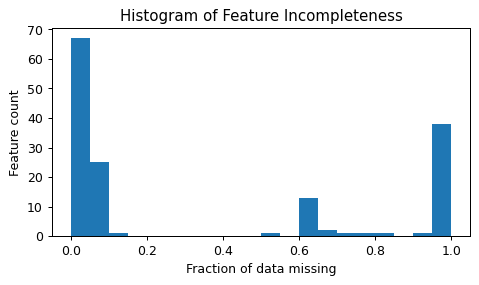

In [12]:
import matplotlib.pyplot as plt

# 데이터의 결측치 비율에 대한 히스토그램을 시각화

plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

히스토그램 분석
- 데이터의 결측치(누락된 값) 비율이 20% 미만인 특성(변수, 컬럼)들과 40%를 초과하는 특성들 사이에 큰 간격이 있음
- = 대부분의 특성은 결측치가 거의 없거나 아주 적은 반면, 일부 특성들은 결측치가 매우 많음

데이터 처리 전략
- 데이터의 30% 이상이 누락된(결측치인) 경우에는 해당 결측치들을 정확하게 채워 넣는 것이 매우 어려움
- -> 결측치가 30%를 초과하는 모든 열(컬럼/특성)들을 데이터셋에서 제거

수행할 작업
1) 데이터셋에서 각 특성별 결측치 비율을 계산
2) 이 중에서 결측치 비율이 30%를 초과하는 모든 특성들의 이름을 식별
3) 식별된 특성들의 이름을 알파벳 순서로 정렬하여 리스트로 저장

In [13]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(len(drop_list)) # 58
print(drop_list)

58
['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last

In [14]:
data.drop(labels=drop_list, axis=1, inplace=True)

In [15]:
data.shape # 151 -> 93

(1345310, 93)

### LendingClub 대출 데이터에서 투자자가 대출에 투자하기 전에 알 수 있었던 정보만을 남기고, 나머지는 제거하기 위한 전처리 과정
- 투자자가 대출 신청 당시 확인할 수 있었던 정보만으로 모델을 만들기 위함
- LendingClub 데이터를 보면 대출 실행 이후에만 알 수 있는 정보도 포함되어 있습니다 (예: 마지막 결제일, 상환 여부, 총 수익 등).
이런 정보는 미래 데이터에 해당하므로 훈련에 사용하면 안 됨 — 즉, 데이터 누수(Data Leakage) 발생 가능.

In [16]:
print(sorted(data.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sa

- 각 기능에 대해 데이터 사전의 설명을 확인하고 대출 투자를 고려하는 투자자가 이용할 수 있는 기능만 유지

In [17]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [18]:
len(keep_list)

31

In [19]:
drop_list = [col for col in data.columns if col not in keep_list]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'url', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc

In [20]:
len(drop_list)

62

In [21]:
data.drop(labels=drop_list, axis=1, inplace=True)

In [22]:
data.shape

(1345310, 31)

### 전처리 및 탐색적 분석
각 특성(피처)들을 개별적으로 검토하며 다음 작업들을 수행
- 대출 상태를 예측하는 데 유용하지 않다면 해당 특성을 제거
- 요약 통계를 확인하고 데이터를 시각화하며, 대출 상태와 비교하여 그래프를 그림
- 필요하다면, 모델링에 유용하도록 해당 특성을 수정

In [23]:
# 데이터셋의 각 특성이 어떻게 생겼는지(분포), 그리고 우리가 예측하고자 하는 대출 상태와 어떤 연관성이 있는지 탐색하고 시각화

import seaborn as sns

def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.histplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(data[col_name], order=sorted(data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = data.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

### (1) id
- Data Dictionary: "A unique [LendingClub] assigned ID for the loan listing."

In [24]:
data['id'].sample(5)

1281495    15710808
72876      63899355
1887707     2372586
1313584    12786309
232526     54027949
Name: id, dtype: object

In [25]:
data['id'].describe()

count      1345310
unique     1345310
top       68407277
freq             1
Name: id, dtype: object

- 모든 값이 고유함
- (고유한 값이 너무 많아 범주형 변수로 사용하기 어렵고, 값의 크기가 매우 다양하여 수치형 변수로서의 유의미성이 없음)
- -> ID는 모델링에 유용하지 않아 변수 제거

In [26]:
data.drop('id', axis=1, inplace=True)

### (2) loan_amnt
- Data Dictionary: "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
- 대출 신청 금액은 대출자가 신청한 대출 금액을 나타냅니다. 만약 신용 부서에서 대출 금액을 감액할 경우, 이 값에 반영됨

In [27]:
data['loan_amnt'].describe()

count    1.345310e+06
mean     1.441997e+04
std      8.717051e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

In [28]:
data['loan_amnt'].min()

500.0

In [29]:
data['loan_amnt'].median()

12000.0

In [30]:
data['loan_amnt'].max()

40000.0

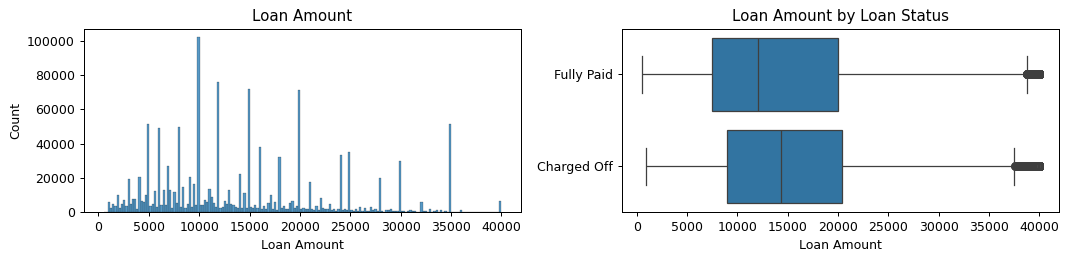

In [31]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

- 대출 금액은 500달러에서 40,000달러까지 다양하며, 중앙값은 12,000달러
- 상각된 대출일수록 대출 금액이 높은 경향이 있음

In [32]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,15565.055444,8814.560077,900.0,9000.0,14350.0,20400.0,40000.0
Fully Paid,1076751.0,14134.369808,8669.028973,500.0,7500.0,12000.0,20000.0,40000.0


### (3) term
- Data Dictionary: "The number of payments on the loan. Values are in months and can be either 36 or 60."
- 데이터 사전: “대출에 대한 지불 횟수입니다. 값은 개월 단위이며 36개월 또는 60개월이 될 수 있습니다.”

In [33]:
data['term'].value_counts(dropna=False)

term
36 months    1020743
60 months     324567
Name: count, dtype: int64

In [34]:
import numpy as np

# 문자열(string)로 된 대출 상환 기간 정보 (36 months, 60 months)
# -> (머신러닝이나 분석에 쓰기 쉽도록) 숫자형(integer) 으로 변환
data['term'] = data['term'].apply(lambda s: np.int8(s.split()[0]))

In [35]:
data['term'].value_counts(normalize=True)

term
36    0.758742
60    0.241258
Name: proportion, dtype: float64

- 전체 상환이 완료된 대출 중 약 76%는 3년 상환 기간을 갖고 있으며, 나머지는 5년 상환 기간

대출 기간에 따라 부도율(charge-off rate) 이 얼마나 차이가 나는지

In [36]:
data.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.159934
60    0.324454
Name: proportion, dtype: float64

- 5년 대출은 3년 대출보다 부도 처리될 가능성이 2배 정도 높음

### (4) int_rate
- Data Dictionary: "Interest Rate on the loan."

In [37]:
data['int_rate'].describe()

count    1.345310e+06
mean     1.323962e+01
std      4.768716e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

In [38]:
data['int_rate'].min()

5.31

In [39]:
data['int_rate'].median()

12.74

In [40]:
data['int_rate'].max()

30.99

- 이자율은 최저 5.31%에서 최고 30.99%까지 다양하며, 중앙값은 12.74%

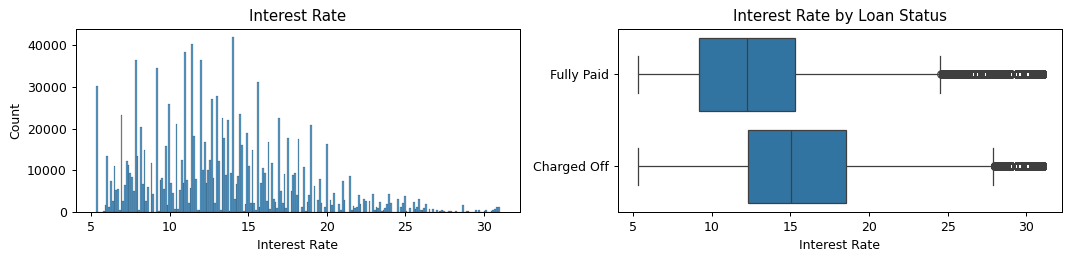

In [41]:
plot_var('int_rate', 'Interest Rate', continuous=True)

- 부도 처리된 대출은 상대적으로 훨씬 높은 이자율을 갖는 경향이 있음
- 대출 상태별로 요약 통계량 비교:

In [42]:
data.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,15.710714,4.910387,5.31,12.29,15.05,18.55,30.99
Fully Paid,1076751.0,12.623288,4.527227,5.31,9.17,12.23,15.31,30.99


### (5) installment

In [43]:
data['installment'].describe()

count    1.345310e+06
mean     4.380755e+02
std      2.615126e+02
min      4.930000e+00
25%      2.484800e+02
50%      3.754300e+02
75%      5.807300e+02
max      1.719830e+03
Name: installment, dtype: float64

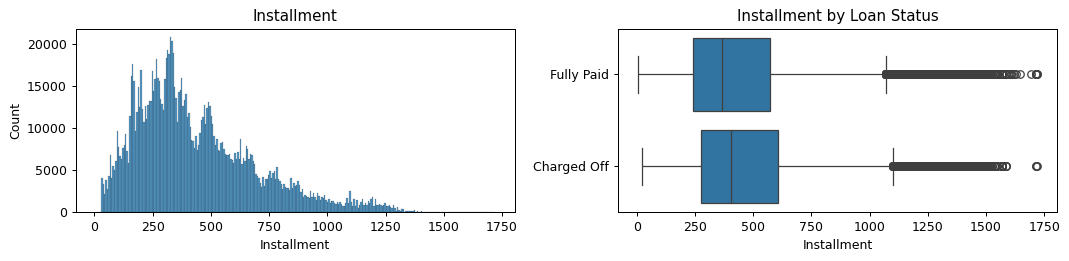

In [44]:
plot_var('installment', 'Installment', continuous=True)

In [45]:
data.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,465.147994,262.774106,21.62,275.29,402.83,605.31,1717.63
Fully Paid,1076751.0,431.323226,260.759563,4.93,240.92,368.26,573.06,1719.83


### (6) grade, sub_grade

In [46]:
print(sorted(data['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [47]:
print(sorted(data['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


- subgrade에 grade 정보 포함 -> grade 컬럼 삭제

In [48]:
data.drop('grade', axis=1, inplace=True)

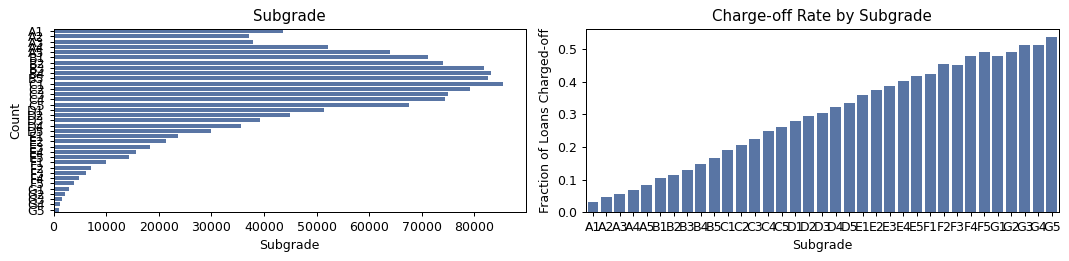

In [49]:
plot_var('sub_grade', 'Subgrade', continuous=False)

### (7) emp_title

In [50]:
data['emp_title'].describe()

count     1259525
unique     378353
top       Teacher
freq        21268
Name: emp_title, dtype: object

- 직업(job_title) 항목에는 너무 다양한 값이 존재해서 분석에 유용하지 않으므로 해당 컬럼을 삭제

In [51]:
data.drop(labels='emp_title', axis=1, inplace=True)

### (8) emp_length

In [52]:
data['emp_length'].value_counts(dropna=False).sort_index()

emp_length
1 year        88494
10+ years    442199
2 years      121743
3 years      107597
4 years       80556
5 years       84154
6 years       62733
7 years       59624
8 years       60701
9 years       50937
< 1 year     108061
NaN           78511
Name: count, dtype: int64

- 누락 데이터 78511개

- emp_length 컬럼의 값을 정수형(integer) 으로 변환

C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\2379937944.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\2379937944.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

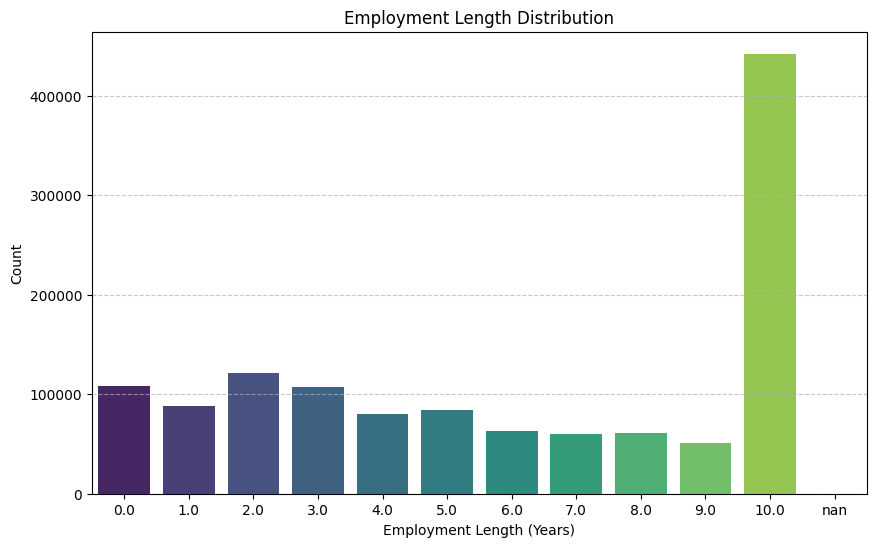

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. '10+ years'를 '10 years'로 변경합니다.
data['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)

# 2. '< 1 year'를 '0 years'로 변경합니다.
data['emp_length'].replace('< 1 year', '0 years', inplace=True)

# 3. emp_length 문자열을 정수형으로 변환하는 함수를 정의합니다.
def emp_length_to_int(s):
    if pd.isnull(s):
        return s  # NaN 값은 그대로 반환
    else:
        try:
            # 문자열에서 숫자 부분만 추출하여 정수형으로 변환
            return np.int8(s.split()[0])
        except (AttributeError, ValueError):
            return s # 변환 실패 시 원래 값 반환

# 4. 정의한 함수를 emp_length 컬럼에 적용합니다.
data['emp_length'] = data['emp_length'].apply(emp_length_to_int)

# 5. 변환된 emp_length의 분포를 확인하고 정렬합니다.
transformed_counts = data['emp_length'].value_counts(dropna=False).sort_index()

# 6. 'emp_length' 컬럼의 분포를 시각화합니다.
# 플로팅을 위해 숫자로 변환된 emp_length를 범주형으로 변환하여 정렬을 올바르게 합니다.
data['emp_length'] = pd.Categorical(data['emp_length'], categories=sorted(data['emp_length'].dropna().unique()))

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='emp_length', palette='viridis', order=transformed_counts.index)
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\437318301.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charge_off_rates = data.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']


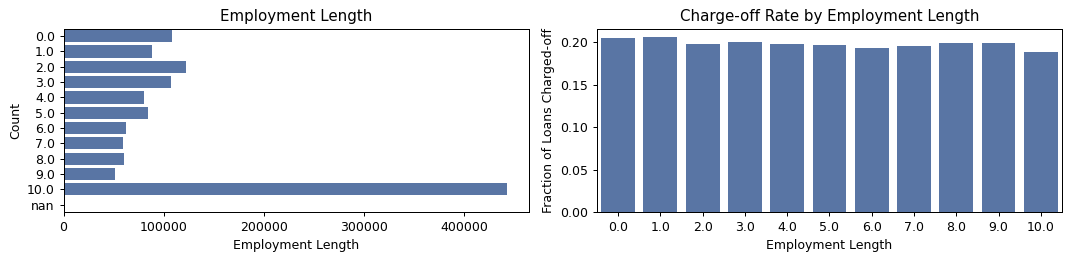

In [54]:
plot_var('emp_length', 'Employment Length', continuous=False)

### (9) home_ownership

In [55]:
data['home_ownership'].value_counts(dropna=False)

home_ownership
MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: count, dtype: int64

In [56]:
data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\3992848594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)


In [57]:
data['home_ownership'].value_counts(dropna=False)

home_ownership
MORTGAGE    665579
RENT        534421
OWN         144832
OTHER          478
Name: count, dtype: int64

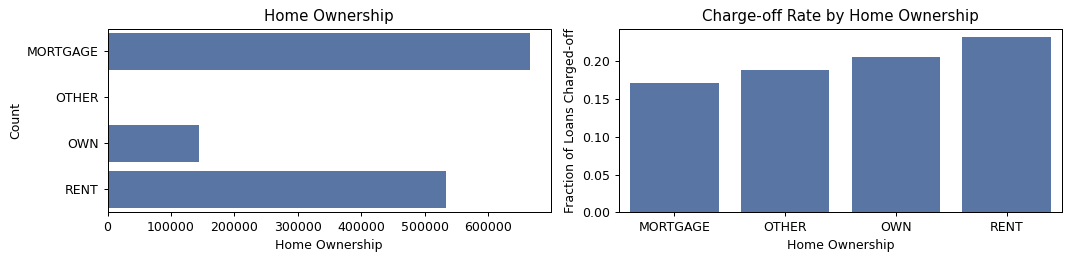

In [58]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

In [59]:
data.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.172077
OTHER       0.188285
OWN         0.206198
RENT        0.232165
Name: proportion, dtype: float64

### (10) annual_inc

In [60]:
data['annual_inc'].describe()

count    1.345310e+06
mean     7.624764e+04
std      6.992510e+04
min      0.000000e+00
25%      4.578000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

In [61]:
data['log_annual_inc'] = data['annual_inc'].apply(lambda x: np.log10(x+1))

In [62]:
data.drop('annual_inc', axis=1, inplace=True)

In [63]:
data['log_annual_inc'].describe()

count    1.345310e+06
mean     4.812814e+00
std      2.477200e-01
min      0.000000e+00
25%      4.660685e+00
50%      4.812920e+00
75%      4.954247e+00
max      7.041361e+00
Name: log_annual_inc, dtype: float64

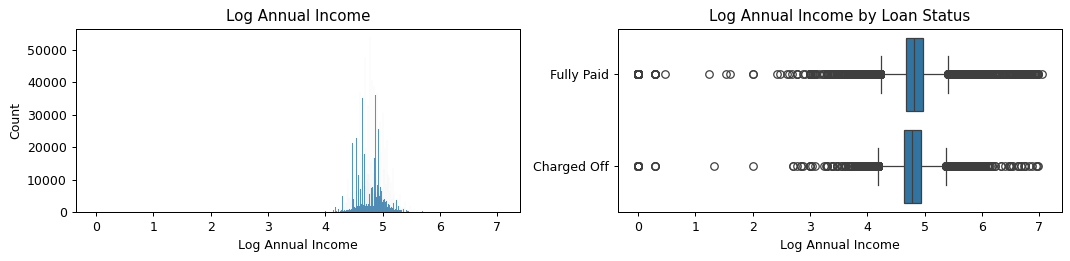

In [64]:
plot_var('log_annual_inc', 'Log Annual Income', continuous=True)

In [65]:
data.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,4.781756,0.241984,0.0,4.633479,4.778158,4.929424,6.977724
Fully Paid,1076751.0,4.820560,0.248526,0.0,4.672107,4.812920,4.968488,7.041361


### (11) verification_status

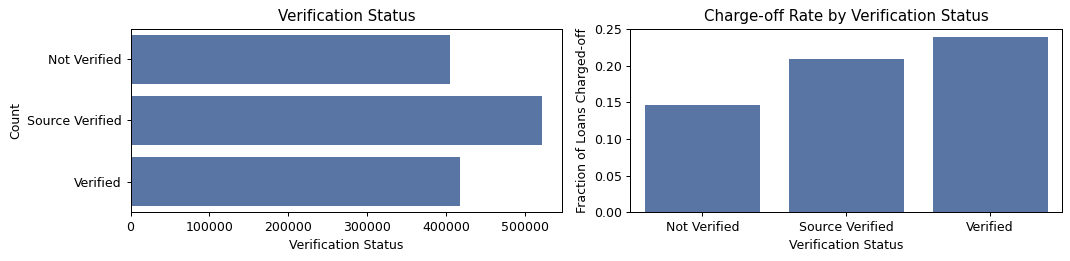

In [66]:
plot_var('verification_status', 'Verification Status', continuous=False)

### (12) issue_d

### (13) purpose

In [67]:
data['purpose'].value_counts()

purpose
debt_consolidation    780321
credit_card           295279
home_improvement       87504
other                  77875
major_purchase         29425
medical                15554
small_business         15416
car                    14585
moving                  9480
vacation                9065
house                   7253
wedding                 2294
renewable_energy         933
educational              326
Name: count, dtype: int64

In [68]:
data.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
wedding               0.121622
car                   0.146795
credit_card           0.169270
educational           0.171779
home_improvement      0.177158
major_purchase        0.185998
vacation              0.191726
other                 0.210401
debt_consolidation    0.211469
medical               0.217757
house                 0.218806
moving                0.233544
renewable_energy      0.236870
small_business        0.297094
Name: proportion, dtype: float64

### (14) title

In [69]:
data['title'].describe()

count                1328650
unique                 61681
top       Debt consolidation
freq                  660960
Name: title, dtype: object

In [70]:
data['title'].value_counts().head(10)

title
Debt consolidation         660960
Credit card refinancing    249910
Home improvement            75073
Other                       66778
Major purchase              24045
Debt Consolidation          15695
Medical expenses            13576
Business                    11750
Car financing               11220
Vacation                     8046
Name: count, dtype: int64

In [71]:
data.drop('title', axis=1, inplace=True)

### (15) zip_code, addr_state

In [72]:
data['zip_code'].sample(5)

397651     080xx
1281974    193xx
1745337    200xx
34762      300xx
2080863    762xx
Name: zip_code, dtype: object

In [73]:
data['zip_code'].nunique()

943

In [74]:
data['addr_state'].sample(5)

951930     CA
2002180    OH
212142     PA
2136716    IN
1764366    TX
Name: addr_state, dtype: object

In [75]:
data['addr_state'].nunique()

51

In [76]:
data.drop(labels='zip_code', axis=1, inplace=True)

In [77]:
data.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

addr_state
DC    0.132086
ME    0.138424
VT    0.139517
IA    0.142857
OR    0.143850
NH    0.145759
WV    0.155187
CO    0.155269
WA    0.157565
SC    0.162769
KS    0.167438
WY    0.167693
MT    0.168716
UT    0.170586
CT    0.173763
RI    0.178675
IL    0.180974
WI    0.183510
GA    0.183927
ID    0.188277
MA    0.190528
CA    0.196104
AZ    0.196299
AK    0.196552
MN    0.197430
DE    0.197462
TX    0.198223
VA    0.199422
HI    0.202013
MI    0.202957
ND    0.204744
OH    0.205283
NC    0.207839
PA    0.207921
KY    0.209829
NJ    0.211212
MO    0.212935
MD    0.213085
SD    0.213227
NM    0.213665
TN    0.214079
IN    0.214082
FL    0.214746
NV    0.219223
NY    0.220435
LA    0.231821
OK    0.234753
AL    0.236321
AR    0.240868
NE    0.251813
MS    0.260777
Name: proportion, dtype: float64

### (16) dti

In [78]:
data['dti'].describe()

count    1.344936e+06
mean     1.828267e+01
std      1.116045e+01
min     -1.000000e+00
25%      1.179000e+01
50%      1.761000e+01
75%      2.406000e+01
max      9.990000e+02
Name: dti, dtype: float64

C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\104706828.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[data['dti'].notnull() & (data['dti']<60), 'dti'], kde=False)


Text(0.5, 1.0, 'Debt-to-income Ratio')

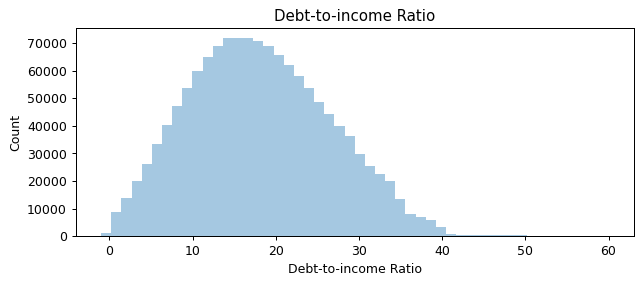

In [79]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(data.loc[data['dti'].notnull() & (data['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [80]:
(data['dti']>=60).sum()

1715

In [81]:
data.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268488.0,20.171196,11.831747,0.0,13.55,19.76,26.31,999.0
Fully Paid,1076448.0,17.811629,10.935927,-1.0,11.43,17.11,23.44,999.0


### (17) earliest_cr_line

In [82]:
data['earliest_cr_line'].sample(5)

1807765    Oct-1994
1636511    Jun-1982
1143237    Feb-1995
500825     Oct-1995
1615609    Jun-2000
Name: earliest_cr_line, dtype: object

In [83]:
data['earliest_cr_line'].isnull().any()

False

In [84]:
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda s: int(s[-4:]))

In [85]:
data['earliest_cr_line'].describe()

count    1.345310e+06
mean     1.998693e+03
std      7.608258e+00
min      1.934000e+03
25%      1.995000e+03
50%      2.000000e+03
75%      2.004000e+03
max      2.015000e+03
Name: earliest_cr_line, dtype: float64

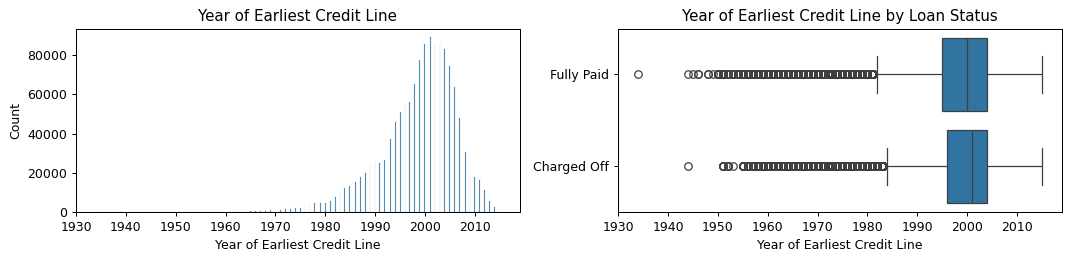

In [86]:
plot_var('earliest_cr_line', 'Year of Earliest Credit Line', continuous=True)

### (18) fico_range_low, fico_range_high

In [87]:
data[['fico_range_low', 'fico_range_high']].describe()

,fico_range_low,fico_range_high
count,1.345310e+06,1.345310e+06
mean,6.961850e+02,7.001852e+02
std,3.185251e+01,3.185316e+01
min,6.250000e+02,6.290000e+02
25%,6.700000e+02,6.740000e+02
50%,6.900000e+02,6.940000e+02
75%,7.100000e+02,7.140000e+02
max,8.450000e+02,8.500000e+02


In [88]:
data[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


In [89]:
data['fico_score'] = 0.5*data['fico_range_low'] + 0.5*data['fico_range_high']

In [90]:
data.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

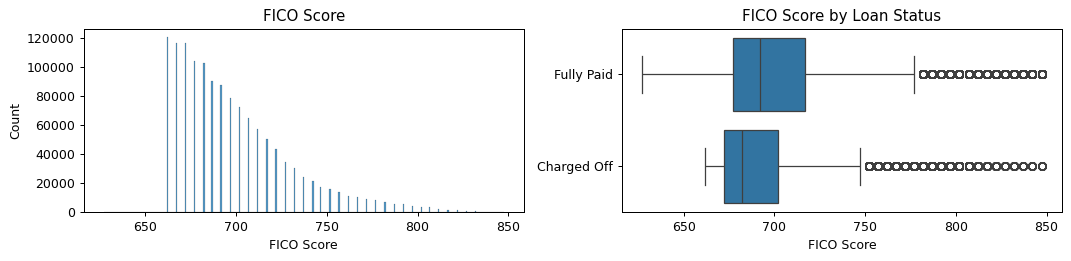

In [91]:
plot_var('fico_score', 'FICO Score', continuous=True)

In [92]:
data.groupby('loan_status')['fico_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,689.850145,25.948737,662.0,672.0,682.0,702.0,847.5
Fully Paid,1076751.0,700.263982,32.834008,627.0,677.0,692.0,717.0,847.5


### (19) open_acc

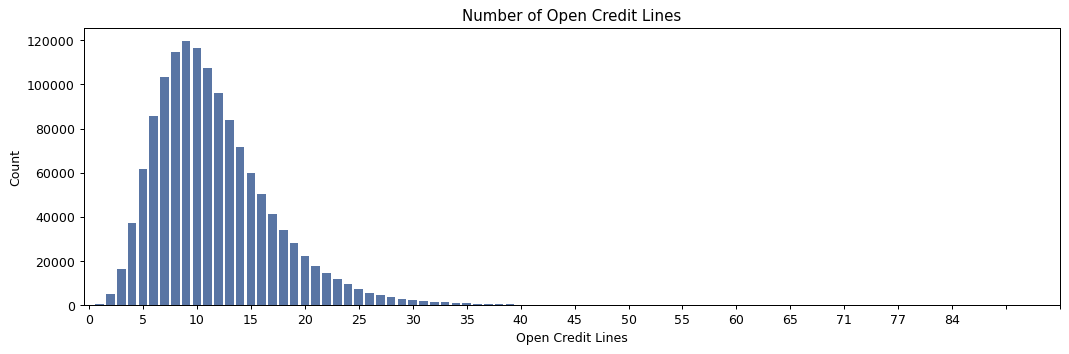

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 정수형 변환
data['open_acc'] = data['open_acc'].astype(int)

# 그래프 그리기
plt.figure(figsize=(14, 4), dpi=90)
sns.countplot(x='open_acc', data=data, order=sorted(data['open_acc'].unique()), color='#5975A4', saturation=1)

# x축 눈금을 5 단위로 설정
max_val = data['open_acc'].max()
plt.xticks(np.arange(0, max_val + 1, 5))
plt.title('Number of Open Credit Lines')
plt.xlabel('Open Credit Lines')
plt.ylabel('Count')
plt.show()

In [94]:
data.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,11.901269,5.637964,0.0,8.0,11.0,15.0,76.0
Fully Paid,1076751.0,11.516763,5.429354,0.0,8.0,11.0,14.0,90.0


### (20) pub_rec

In [95]:
data['pub_rec'].value_counts().sort_index()

pub_rec
0.0     1117425
1.0      190789
2.0       24435
3.0        7399
4.0        2630
5.0        1266
6.0         636
7.0         283
8.0         160
9.0          83
10.0         57
11.0         40
12.0         27
13.0         18
14.0          5
15.0          9
16.0          5
17.0          3
18.0          6
19.0          5
20.0          3
21.0          6
22.0          2
23.0          1
24.0          2
25.0          1
28.0          3
34.0          1
37.0          1
40.0          1
46.0          1
47.0          1
49.0          2
54.0          1
61.0          1
63.0          1
86.0          1
Name: count, dtype: int64

In [96]:
data.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,0.246843,0.656732,0.0,0.0,0.0,0.0,86.0
Fully Paid,1076751.0,0.207403,0.587118,0.0,0.0,0.0,0.0,63.0


### (21) revol_bal

In [97]:
data['revol_bal'].describe()

count    1.345310e+06
mean     1.624811e+04
std      2.232817e+04
min      0.000000e+00
25%      5.943000e+03
50%      1.113400e+04
75%      1.975575e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

In [98]:
data['log_revol_bal'] = data['revol_bal'].apply(lambda x: np.log10(x+1))

In [99]:
data.drop('revol_bal', axis=1, inplace=True)

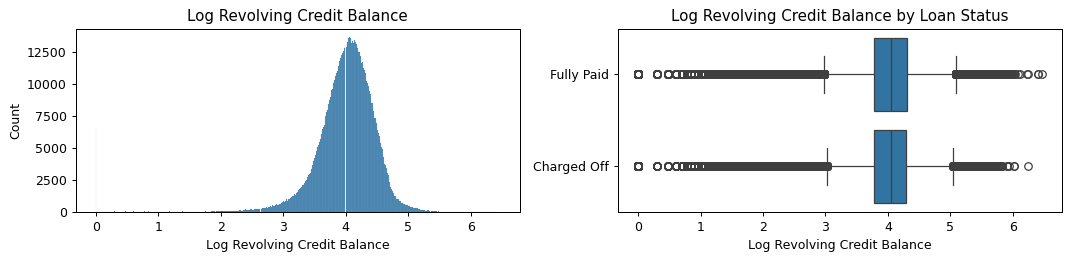

In [100]:
plot_var('log_revol_bal', 'Log Revolving Credit Balance', continuous=True)

In [101]:
data.groupby('loan_status')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,3.985882,0.515100,0.0,3.777499,4.044265,4.281079,6.242223
Fully Paid,1076751.0,3.993775,0.536333,0.0,3.773201,4.047314,4.299420,6.463122


### (22) revol_util

In [102]:
data['revol_util'].describe()

count    1.344453e+06
mean     5.181002e+01
std      2.452107e+01
min      0.000000e+00
25%      3.340000e+01
50%      5.220000e+01
75%      7.070000e+01
max      8.923000e+02
Name: revol_util, dtype: float64

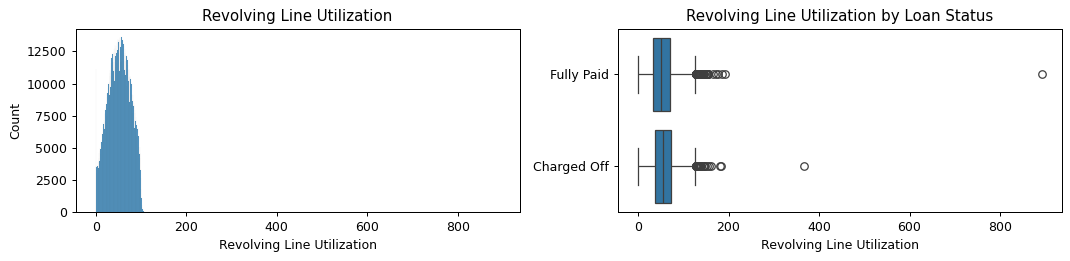

In [103]:
plot_var('revol_util', 'Revolving Line Utilization', continuous=True)

In [104]:
data.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268379.0,54.758433,23.865982,0.0,37.4,55.5,73.1,366.6
Fully Paid,1076074.0,51.074671,24.626821,0.0,32.5,51.3,70.1,892.3


### (23) total_acc

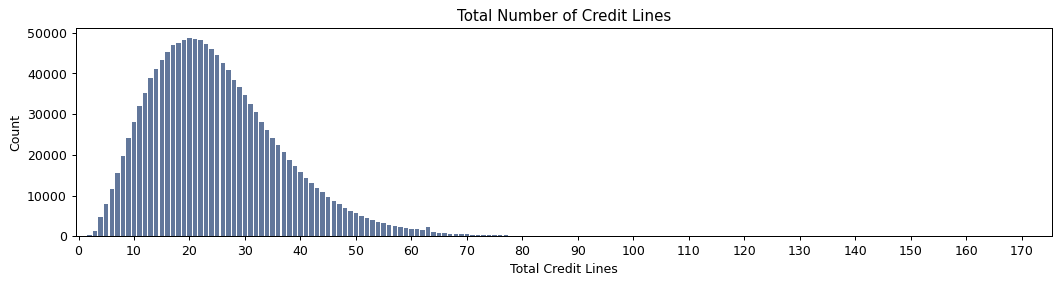

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 0~175까지 10 단위로 모든 값을 포함한 범위 생성
tick_range = np.arange(0, 176, 1)  # 1 단위로 전체 범위 확보
tick_labels = np.arange(0, 176, 10)  # 10 단위로 눈금 표시

# total_acc 빈도 계산 (없는 값은 0으로 채움)
total_acc_counts = data['total_acc'].value_counts().sort_index()
full_range = pd.Series(0, index=tick_range)
full_range.update(total_acc_counts)

# 시각화
plt.figure(figsize=(14, 3), dpi=90)
sns.barplot(x=full_range.index, y=full_range.values, color='#5975A4')

# x축 눈금 설정: 10 단위 라벨만 표시
plt.xticks(tick_labels)
plt.title('Total Number of Credit Lines')
plt.xlabel('Total Credit Lines')
plt.ylabel('Count')
plt.show()

In [106]:
data.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,24.709356,12.117364,2.0,16.0,23.0,31.0,176.0
Fully Paid,1076751.0,25.048551,11.967683,2.0,16.0,23.0,32.0,162.0


### (24) initial_list_status

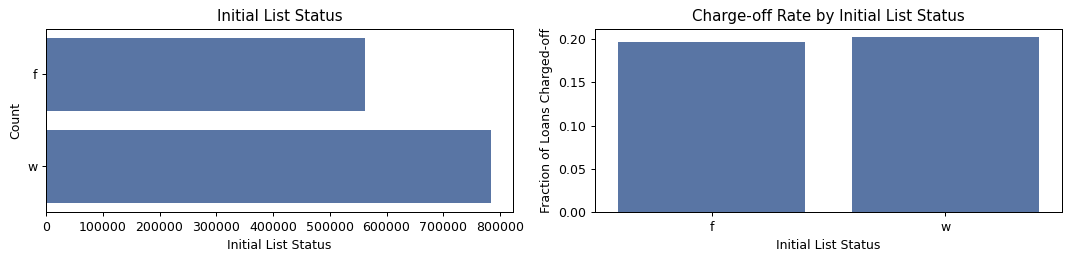

In [107]:
plot_var('initial_list_status', 'Initial List Status', continuous=False)

### (25) application_type

In [108]:
data['application_type'].value_counts()

application_type
Individual    1319510
Joint App       25800
Name: count, dtype: int64

In [109]:
data.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

application_type
Individual    0.198721
Joint App     0.245891
Name: proportion, dtype: float64

### (26) mort_acc

In [110]:
data['mort_acc'].describe()

count    1.298029e+06
mean     1.670783e+00
std      2.000444e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.100000e+01
Name: mort_acc, dtype: float64

In [111]:
data['mort_acc'].value_counts().head(10)

mort_acc
0.0    523837
1.0    226135
2.0    188941
3.0    139381
4.0     94920
5.0     57632
6.0     32539
7.0     16850
8.0      8378
9.0      4285
Name: count, dtype: int64

In [112]:
data.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261673.0,1.371032,1.825505,0.0,0.0,1.0,2.0,29.0
Fully Paid,1036356.0,1.746468,2.035279,0.0,0.0,1.0,3.0,51.0


### (27) pub_rec_bankruptcies

In [113]:
data['pub_rec_bankruptcies'].value_counts().sort_index()

pub_rec_bankruptcies
0.0     1176953
1.0      157696
2.0        7769
3.0        1583
4.0         396
5.0         141
6.0          46
7.0          15
8.0           9
9.0           3
11.0          1
12.0          1
Name: count, dtype: int64

In [114]:
def plot_var(col_name, full_name, continuous):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4), dpi=90)

    if continuous:
        sns.histplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        # 값 정수형 변환 후 countplot
        data[col_name] = data[col_name].astype('Int64')  # Nullable int
        val_counts = data[col_name].value_counts().sort_index()
        sns.barplot(x=val_counts.index.astype(int), y=val_counts.values, color='#5975A4', ax=ax1)
    
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        # Charged Off 비율 계산
        temp = data[[col_name, 'loan_status']].dropna()
        temp[col_name] = temp[col_name].astype(int)

        # Charged Off 비율만 추출
        grouped = temp.groupby(col_name)['loan_status'].value_counts(normalize=True).unstack()
        if 'Charged Off' in grouped.columns:
            charge_off = grouped['Charged Off']
        else:
            charge_off = pd.Series(0, index=grouped.index)

        sns.barplot(x=charge_off.index, y=charge_off.values, color='#5975A4', ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)

    ax2.set_xlabel(full_name)
    plt.tight_layout()

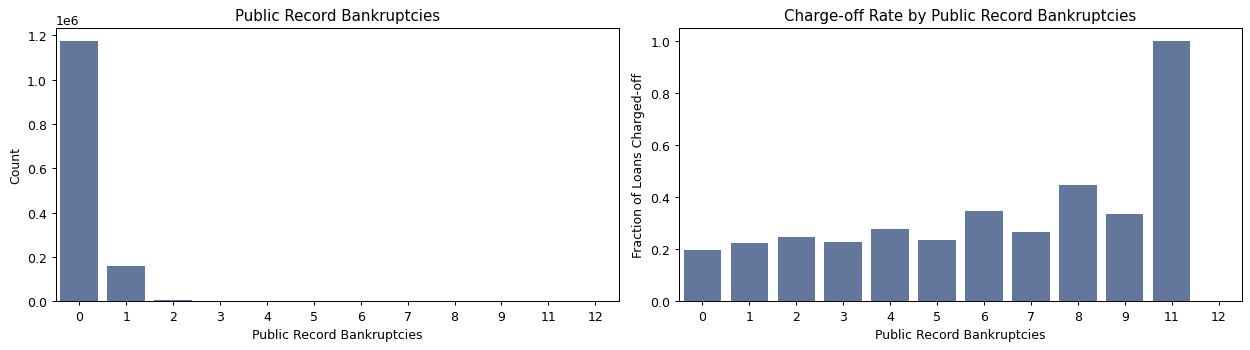

In [115]:
plot_var('pub_rec_bankruptcies', 'Public Record Bankruptcies', continuous=False)

## 추가적 데이터 전처리

### (1) target인 loan_status 변수를 이진 변수로 변경 -> 새 컬럼 charged_off 생성
- 0 : 대출이 완전히 상환된 경우
- 1 : 연체되어 부실 채권이 된 경우

In [116]:
data['charged_off'] = (data['loan_status'] == 'Charged Off').apply(np.uint8)
data.drop('loan_status', axis=1, inplace=True)

### (2) 범주형 변수들 -> 더미 변수 생성

In [117]:
data.shape

(1345310, 25)

In [118]:
missing_fractions = data.isnull().mean().sort_values(ascending=False) # Fraction of data missing for each variable

In [119]:
print(missing_fractions[missing_fractions > 0])

emp_length              0.058359
mort_acc                0.035145
revol_util              0.000637
pub_rec_bankruptcies    0.000518
dti                     0.000278
dtype: float64


In [120]:
print(data.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies',
       'log_annual_inc', 'fico_score', 'log_revol_bal', 'charged_off'],
      dtype='object')


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   loan_amnt             1345310 non-null  float64 
 1   term                  1345310 non-null  int8    
 2   int_rate              1345310 non-null  float64 
 3   installment           1345310 non-null  float64 
 4   sub_grade             1345310 non-null  object  
 5   emp_length            1266799 non-null  category
 6   home_ownership        1345310 non-null  object  
 7   verification_status   1345310 non-null  object  
 8   issue_d               1345310 non-null  object  
 9   purpose               1345310 non-null  object  
 10  addr_state            1345310 non-null  object  
 11  dti                   1344936 non-null  float64 
 12  earliest_cr_line      1345310 non-null  int64   
 13  open_acc              1345310 non-null  int32   
 14  pub_rec               1

In [122]:
data['issue_d'].head()

0    Dec-2015
1    Dec-2015
2    Dec-2015
4    Dec-2015
5    Dec-2015
Name: issue_d, dtype: object

In [123]:
data = pd.get_dummies(data, 
                      columns=['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 
                               'initial_list_status', 'application_type'], 
                      drop_first=True)

In [124]:
data.shape

(1345310, 122)

In [125]:
data.sample(5)

,loan_amnt,term,int_rate,installment,emp_length,issue_d,dti,earliest_cr_line,open_acc,pub_rec,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
385526,7000.0,36,11.44,230.64,3.0,Jan-2015,15.59,2006,20,0.0,...,False,False,False,False,False,False,False,False,True,False
346932,9000.0,36,12.69,301.91,4.0,Mar-2015,18.94,2005,13,0.0,...,False,False,False,False,False,False,False,False,True,False
1709068,15000.0,36,7.24,464.81,0.0,Feb-2017,28.86,2001,24,1.0,...,False,False,False,False,False,False,False,False,True,False
412202,10000.0,36,8.67,316.47,9.0,Jan-2015,15.31,1997,20,0.0,...,False,False,False,False,False,False,False,False,False,False
2116313,16000.0,36,17.09,571.17,3.0,Nov-2017,14.56,2006,10,0.0,...,False,False,False,False,False,False,False,False,True,False


### (3) 훈련/테스트 데이터 나누기

In [126]:
data['issue_d'].sample(5)

937067     May-2017
2188314    Dec-2016
1060899    Feb-2016
651999     Jun-2016
692720     May-2016
Name: issue_d, dtype: object

In [127]:
data['issue_d'].isnull().any()

False

In [128]:
data['issue_d'] = pd.to_datetime(data['issue_d'])

C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\2469893809.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])


In [129]:
data['issue_d'].sample(5)

341272    2015-04-01
937796    2017-05-01
2117525   2017-11-01
401110    2015-01-01
2231074   2016-10-01
Name: issue_d, dtype: datetime64[ns]

In [130]:
data['issue_d'].describe()

count                          1345310
mean     2015-06-06 17:48:20.835048960
min                2007-06-01 00:00:00
25%                2014-07-01 00:00:00
50%                2015-08-01 00:00:00
75%                2016-07-01 00:00:00
max                2018-12-01 00:00:00
Name: issue_d, dtype: object

Text(0.5, 1.0, 'Loans Funded per Year')

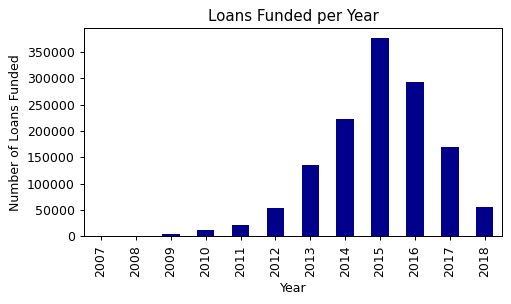

In [131]:
plt.figure(figsize=(6,3), dpi=90)
data['issue_d'].dt.year.value_counts().sort_index().plot.bar(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per Year')

In [132]:
loans_train = data.loc[data['issue_d'] <  data['issue_d'].quantile(0.9)]
loans_test =  data.loc[data['issue_d'] >= data['issue_d'].quantile(0.9)]

In [133]:
print('Number of loans in the partition:   ', loans_train.shape[0] + loans_test.shape[0])
print('Number of loans in the full dataset:', data.shape[0])

Number of loans in the partition:    1345310
Number of loans in the full dataset: 1345310


In [134]:
loans_test.shape[0] / data.shape[0]

0.11111639696426846

In [135]:
del data

In [136]:
loans_train['issue_d'].describe()

count                          1195824
mean     2015-02-14 03:13:47.495684864
min                2007-06-01 00:00:00
25%                2014-05-01 00:00:00
50%                2015-06-01 00:00:00
75%                2016-03-01 00:00:00
max                2017-05-01 00:00:00
Name: issue_d, dtype: object

In [137]:
loans_test['issue_d'].describe()

count                           149486
mean     2017-11-23 13:15:22.119796992
min                2017-06-01 00:00:00
25%                2017-08-01 00:00:00
50%                2017-11-01 00:00:00
75%                2018-03-01 00:00:00
max                2018-12-01 00:00:00
Name: issue_d, dtype: object

In [138]:
loans_train.drop('issue_d', axis=1, inplace=True)
loans_test.drop('issue_d', axis=1, inplace=True)

In [139]:
y_train = loans_train['charged_off']
y_test = loans_test['charged_off']

In [140]:
X_train = loans_train.drop('charged_off', axis=1)
X_test = loans_test.drop('charged_off', axis=1)

In [141]:
del loans_train, loans_test

## target(charged_off)과 피쳐 간의 선형 상관관계 분석

In [142]:
linear_dep = pd.DataFrame()

피어슨 상관계수
- -1 ~ 1 사이 값으로, 절댓값이 클수록 강한 선형 관계

In [143]:
for col in X_train.columns:
    linear_dep.loc[col, 'pearson_corr'] = X_train[col].corr(y_train)
linear_dep['abs_pearson_corr'] = abs(linear_dep['pearson_corr'])

F-통계량
- (각 변수와 charged_off 간 분산분석(ANOVA)을 수행)
- F 값은 그룹 간 차이가 유의미한지를 나타냄
- p_value는 그 유의성의 확률값(작을수록 유의미함)
- (결측치가 없는 부분만 사용해 계산)

In [144]:
from sklearn.feature_selection import f_classif
for col in X_train.columns:
    mask = X_train[col].notnull()
    (linear_dep.loc[col, 'F'], linear_dep.loc[col, 'p_value']) = f_classif(pd.DataFrame(X_train.loc[mask, col]), y_train.loc[mask])

- 피어슨 상관계수의 절대값에 따라 정렬

In [145]:
linear_dep.sort_values('abs_pearson_corr', ascending=False, inplace=True)
linear_dep.drop('abs_pearson_corr', axis=1, inplace=True)

In [146]:
# index 리셋
linear_dep.reset_index(inplace=True)
linear_dep.rename(columns={'index':'variable'}, inplace=True)

- target과 상관관계 강한 상위 20개 변수

In [147]:
linear_dep.head(20)

,variable,pearson_corr,F,p_value
0,int_rate,0.260727,87219.488733,0.0
1,term,0.182364,41138.501332,0.0
2,fico_score,-0.131392,21007.091229,0.0
3,dti,0.100747,12261.190248,0.0
4,mort_acc,-0.072414,6054.501347,0.0
5,sub_grade_A4,-0.065653,5176.669917,0.0
6,log_annual_inc,-0.065324,5124.653113,0.0
7,sub_grade_A5,-0.065204,5105.863849,0.0
8,sub_grade_A2,-0.063053,4773.117611,0.0
9,home_ownership_RENT,0.062418,4677.205362,0.0


- target과 상관관계 약한 하위 20개 변수

In [148]:
linear_dep.tail(20)

,variable,pearson_corr,F,p_value
100,addr_state_WY,-0.003484,14.512058,0.000139
101,addr_state_KY,0.003284,12.899558,0.000329
102,addr_state_RI,-0.003236,12.524695,0.000402
103,addr_state_NC,0.003228,12.462234,0.000415
104,addr_state_NM,0.002456,7.211381,0.007244
105,purpose_renewable_energy,0.002105,5.297637,0.021355
106,addr_state_TX,-0.001797,3.853799,0.049634
107,addr_state_SD,0.001611,3.102581,0.078169
108,addr_state_MI,0.001250,1.865744,0.171964
109,purpose_vacation,-0.001205,1.737135,0.187502


- 상관관계가 높 변수: 이자율, 대출 기간(만기), FICO 점수, 소득 대비 부채 비율, 모기지 건수, 소득, 대출 등급, 대출 금액
- 상관관계 낮은 변수: 대출자의 거주 상태, 회전 잔액 및 대출 목적

## 모델 훈련 및 테스트
- 모델: Logistic Regression, Random Forest, k-Nearest Neighbors
- 성능 지표: AUROC (Area Under Receiver Operating Characteristic curve) 점수

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

### (1) 로지스틱 회귀 (+ SGD 학습)
- SGDClassifier : 확률적 경사 하강법(SGD)을 이용해 선형 분류기를 훈련

In [150]:
import optuna
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
import numpy as np

# 고정 파이프라인 구조 (모델 제외)
base_pipeline = Pipeline([
    ('imputer', SimpleImputer(copy=False)),
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(
        loss='log_loss',
        max_iter=1000,
        tol=1e-3,
        random_state=1,
        warm_start=True
    ))
])

# Optuna 목적 함수 정의
def objective(trial):
    # 하이퍼파라미터 샘플링
    alpha = trial.suggest_float('alpha', 1e-5, 1e1, log=True)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])

    # 파이프라인 복제 및 파라미터 설정
    pipeline = clone(base_pipeline)
    pipeline.set_params(model__alpha=alpha, model__penalty=penalty)

    # 교차 검증으로 평가
    score = cross_val_score(
        pipeline, X_train, y_train,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1
    ).mean()

    return score

# 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, show_progress_bar=True)

# 최적 결과 출력
print("Best Score:", study.best_value)
print("Best Params:", study.best_params)

[I 2025-06-11 12:11:37,006] A new study created in memory with name: no-name-cc7b43a8-d066-4d94-acca-14b083046d55


  0%|          | 0/30 [00:00<?, ?it/s]

C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:12:01,627] Trial 0 finished with value: 0.5 and parameters: {'alpha': 3.6556948924092683, 'penalty': 'l1'}. Best is trial 0 with value: 0.5.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:12:28,514] Trial 1 finished with value: 0.5 and parameters: {'alpha': 2.377537921416734, 'penalty': 'l1'}. Best is trial 0 with value: 0.5.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:12:55,212] Trial 2 finished with value: 0.5 and parameters: {'alpha': 2.201464454710467, 'penalty': 'l1'}. Best is trial 0 with value: 0.5.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:13:18,514] Trial 3 finished with value: 0.5 and parameters: {'alpha': 0.9033295840061406, 'penalty': 'l1'}. Best is trial 0 with value: 0.5.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:13:41,272] Trial 4 finished with value: 0.5 and parameters: {'alpha': 0.46288362792579607, 'penalty': 'l1'}. Best is trial 0 with value: 0.5.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:14:02,506] Trial 5 finished with value: 0.6426738712138451 and parameters: {'alpha': 0.09097168876530401, 'penalty': 'l1'}. Best is trial 5 with value: 0.6426738712138451.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:14:21,026] Trial 6 finished with value: 0.7052249886210058 and parameters: {'alpha': 8.610719379365733, 'penalty': 'l2'}. Best is trial 6 with value: 0.7052249886210058.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:14:43,312] Trial 7 finished with value: 0.7062568362530434 and parameters: {'alpha': 9.921366110257541e-05, 'penalty': 'l2'}. Best is trial 7 with value: 0.7062568362530434.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:15:40,867] Trial 8 finished with value: 0.693083340834737 and parameters: {'alpha': 0.022456239531861353, 'penalty': 'l1'}. Best is trial 7 with value: 0.7062568362530434.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:16:05,717] Trial 9 finished with value: 0.5 and parameters: {'alpha': 9.092501192572332, 'penalty': 'l1'}. Best is trial 7 with value: 0.7062568362530434.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:16:34,289] Trial 10 finished with value: 0.7019799352024678 and parameters: {'alpha': 4.0288471238654616e-05, 'penalty': 'l2'}. Best is trial 7 with value: 0.7062568362530434.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:16:53,747] Trial 11 finished with value: 0.7099407927209744 and parameters: {'alpha': 0.00033282794102285887, 'penalty': 'l2'}. Best is trial 11 with value: 0.7099407927209744.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:17:14,353] Trial 12 finished with value: 0.707467130520558 and parameters: {'alpha': 0.0001945810977537339, 'penalty': 'l2'}. Best is trial 11 with value: 0.7099407927209744.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:17:33,141] Trial 13 finished with value: 0.7105417108274897 and parameters: {'alpha': 0.0006142205748503551, 'penalty': 'l2'}. Best is trial 13 with value: 0.7105417108274897.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:17:50,874] Trial 14 finished with value: 0.7112124019384087 and parameters: {'alpha': 0.0010865385153742322, 'penalty': 'l2'}. Best is trial 14 with value: 0.7112124019384087.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:18:07,629] Trial 15 finished with value: 0.7112226585801416 and parameters: {'alpha': 0.0017330377881228122, 'penalty': 'l2'}. Best is trial 15 with value: 0.7112226585801416.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:18:24,421] Trial 16 finished with value: 0.711348534205323 and parameters: {'alpha': 0.0027155570075979834, 'penalty': 'l2'}. Best is trial 16 with value: 0.711348534205323.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:18:41,291] Trial 17 finished with value: 0.7114041383916837 and parameters: {'alpha': 0.004640335461012205, 'penalty': 'l2'}. Best is trial 17 with value: 0.7114041383916837.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:18:58,143] Trial 18 finished with value: 0.7114125616879706 and parameters: {'alpha': 0.0056333876929571735, 'penalty': 'l2'}. Best is trial 18 with value: 0.7114125616879706.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:19:14,957] Trial 19 finished with value: 0.7113400806661203 and parameters: {'alpha': 0.01998555687718694, 'penalty': 'l2'}. Best is trial 18 with value: 0.7114125616879706.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:19:59,285] Trial 20 finished with value: 0.6900606891336512 and parameters: {'alpha': 1.0331404670149623e-05, 'penalty': 'l2'}. Best is trial 18 with value: 0.7114125616879706.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:20:15,833] Trial 21 finished with value: 0.7114035201308138 and parameters: {'alpha': 0.0045891999575676835, 'penalty': 'l2'}. Best is trial 18 with value: 0.7114125616879706.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:20:32,554] Trial 22 finished with value: 0.7114165406181295 and parameters: {'alpha': 0.006786309313139905, 'penalty': 'l2'}. Best is trial 22 with value: 0.7114165406181295.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:20:48,502] Trial 23 finished with value: 0.7104238179270768 and parameters: {'alpha': 0.09146802471136808, 'penalty': 'l2'}. Best is trial 22 with value: 0.7114165406181295.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:21:05,370] Trial 24 finished with value: 0.7114149334868886 and parameters: {'alpha': 0.009086631434318765, 'penalty': 'l2'}. Best is trial 22 with value: 0.7114165406181295.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:21:22,057] Trial 25 finished with value: 0.7109395570782242 and parameters: {'alpha': 0.05233781425592829, 'penalty': 'l2'}. Best is trial 22 with value: 0.7114165406181295.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:21:39,009] Trial 26 finished with value: 0.7114133415096692 and parameters: {'alpha': 0.009585181941540108, 'penalty': 'l2'}. Best is trial 22 with value: 0.7114165406181295.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:21:55,844] Trial 27 finished with value: 0.7113525999910015 and parameters: {'alpha': 0.018661580372019412, 'penalty': 'l2'}. Best is trial 22 with value: 0.7114165406181295.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:22:11,678] Trial 28 finished with value: 0.7098951630398693 and parameters: {'alpha': 0.13776517211947173, 'penalty': 'l2'}. Best is trial 22 with value: 0.7114165406181295.


C:\Users\KDT6\AppData\Local\Temp\ipykernel_43864\886712062.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)


[I 2025-06-11 12:22:27,627] Trial 29 finished with value: 0.7087496983207542 and parameters: {'alpha': 0.27662341054342354, 'penalty': 'l2'}. Best is trial 22 with value: 0.7114165406181295.
Best Score: 0.7114165406181295
Best Params: {'alpha': 0.006786309313139905, 'penalty': 'l2'}


In [152]:
# from sklearn.linear_model import SGDClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import ParameterGrid, cross_val_score
# from tqdm.auto import tqdm
# import numpy as np
# import pandas as pd

# # 1. 파이프라인 정의
# pipeline_sgdlogreg = Pipeline([
#     ('imputer', SimpleImputer(copy=False)),  
#     ('scaler', StandardScaler(copy=False)),  
#     ('model', SGDClassifier(
#         loss='log_loss',
#         max_iter=1000,
#         tol=1e-3,
#         random_state=1,
#         warm_start=True
#     ))
# ])

# # 2. 파라미터 그리드 정의
# param_grid = {
#     'model__alpha': [1e-5, 1e-2, 10],
#     'model__penalty': ['l1', 'l2']
# }
# params_list = list(ParameterGrid(param_grid))

# # 3. tqdm으로 감싸서 진행률 표시
# results1 = []

# for params in tqdm(params_list, desc="GridSearch", unit="combination"):
#     pipeline_sgdlogreg.set_params(**params)
#     scores = cross_val_score(
#         pipeline_sgdlogreg, 
#         X_train, y_train, 
#         cv=5, scoring='roc_auc', n_jobs=-1
#     )
#     results1.append({
#         'params': params,
#         'mean_score': np.mean(scores)
#     })

# # 4. 결과를 정리
# results_df1 = pd.DataFrame(results1)
# best_result1 = results_df1.loc[results_df1['mean_score'].idxmax()]

# # 출력
# print("Best hyperparameters:")
# print(best_result1['params'])
# print("Best AUROC score:")
# print(best_result1['mean_score'])

### (2) Random forest classifier

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import ParameterGrid, cross_val_score
# from tqdm.auto import tqdm
# import numpy as np
# import pandas as pd

# # 1. 파이프라인 정의
# pipeline_rfc = Pipeline([
#     ('imputer', SimpleImputer(copy=False)),
#     ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
# ])

# # 2. 파라미터 그리드 정의
# param_grid_rfc = {
#     'model__n_estimators': [50, 100, 200],
#     'model__max_depth': [None, 10, 20],
#     'model__max_features': ['sqrt', 'log2']
# }
# params_list = list(ParameterGrid(param_grid_rfc))

# # 3. tqdm으로 감싸서 진행률 표시
# results2 = []

# for params in tqdm(params_list, desc="RandomForest GridSearch", unit="combination"):
#     pipeline_rfc.set_params(**params)
#     scores = cross_val_score(
#         pipeline_rfc, 
#         X_train, y_train, 
#         cv=5, scoring='roc_auc', n_jobs=-1
#     )
#     results2.append({
#         'params': params,
#         'mean_score': np.mean(scores)
#     })

# # 4. 결과를 정리
# results_df2 = pd.DataFrame(results2)
# best_result2 = results_df2.loc[results_df2['mean_score'].idxmax()]

# # 출력
# print("Best hyperparameters:")
# print(best_result2['params'])
# print("Best AUROC score:")
# print(best_result2['mean_score'])

In [157]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
import numpy as np

# 고정 파이프라인 구조 (모델 제외)
base_pipeline_rfc = Pipeline([
    ('imputer', SimpleImputer(copy=False)),
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

# Optuna 목적 함수 정의
def objective(trial):
    # 하이퍼파라미터 샘플링
    n_estimators = trial.suggest_categorical('n_estimators', [50, 100, 200])
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20])
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    # 파이프라인 복제 및 파라미터 설정
    pipeline = clone(base_pipeline_rfc)
    pipeline.set_params(
        model__n_estimators=n_estimators,
        model__max_depth=max_depth,
        model__max_features=max_features
    )

    # 교차 검증으로 평가
    score = cross_val_score(
        pipeline, X_train, y_train,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1
    ).mean()

    return score

# 최적화 실행
study_rfc = optuna.create_study(direction='maximize')
study_rfc.optimize(objective, n_trials=30, show_progress_bar=True)

# 최적 결과 출력
print("Best AUROC Score:", study_rfc.best_value)
print("Best Hyperparameters:", study_rfc.best_params)

[I 2025-06-11 12:24:11,863] A new study created in memory with name: no-name-7ab99088-9f3b-4170-827a-558f63dc8076


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-06-11 12:25:54,486] Trial 0 finished with value: 0.706794358594122 and parameters: {'n_estimators': 50, 'max_depth': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.706794358594122.
[I 2025-06-11 12:30:36,409] Trial 1 finished with value: 0.694592576255183 and parameters: {'n_estimators': 50, 'max_depth': None, 'max_features': 'log2'}. Best is trial 0 with value: 0.706794358594122.
[I 2025-06-11 12:35:03,371] Trial 2 finished with value: 0.7063987290379338 and parameters: {'n_estimators': 200, 'max_depth': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.706794358594122.
[I 2025-06-11 12:36:46,122] Trial 3 finished with value: 0.706794358594122 and parameters: {'n_estimators': 50, 'max_depth': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.706794358594122.
[I 2025-06-11 12:38:28,745] Trial 4 finished with value: 0.706794358594122 and parameters: {'n_estimators': 50, 'max_depth': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.70679435

### (3) k-nearest neighbors

In [159]:
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
import numpy as np

# 고정된 기본 파이프라인 구조 (하이퍼파라미터 제외)
base_pipeline = Pipeline([
    ('imputer', SimpleImputer(copy=False)),
    ('scaler', StandardScaler(copy=False)),
    ('lda', LinearDiscriminantAnalysis()),
    ('model', KNeighborsClassifier(n_jobs=-1))
])

# Optuna 목적 함수 정의
def objective(trial):
    n_features = X_train.shape[1]
    n_classes = len(np.unique(y_train))
    max_lda_components = min(n_features, n_classes - 1)

    # 가능한 n_components 후보 리스트
    possible_components = [3, 9]
    # 조건에 맞는 값만 필터링
    valid_components = [c for c in possible_components if c <= max_lda_components]

    # 만약 조건에 맞는 값이 없으면 1로 고정 (예외처리)
    if not valid_components:
        valid_components = [1]

    lda_n_components = trial.suggest_categorical('lda__n_components', valid_components)
    n_neighbors = trial.suggest_categorical('model__n_neighbors', [5, 25, 125])

    pipeline = clone(base_pipeline)
    pipeline.set_params(
        lda__n_components=lda_n_components,
        model__n_neighbors=n_neighbors
    )

    score = cross_val_score(
        pipeline, X_train, y_train,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1
    ).mean()

    return score

# Optuna 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20, show_progress_bar=True)

# 결과 출력
print("Best AUROC score:", study.best_value)
print("Best hyperparameters:", study.best_params)

[I 2025-06-11 16:09:09,503] A new study created in memory with name: no-name-7e30b186-a74a-47bb-8c72-48a34d892687


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-06-11 16:10:54,395] Trial 0 finished with value: 0.7029806543196433 and parameters: {'lda__n_components': 1, 'model__n_neighbors': 125}. Best is trial 0 with value: 0.7029806543196433.
[I 2025-06-11 16:12:32,928] Trial 1 finished with value: 0.617390087265759 and parameters: {'lda__n_components': 1, 'model__n_neighbors': 5}. Best is trial 0 with value: 0.7029806543196433.
[I 2025-06-11 16:14:09,890] Trial 2 finished with value: 0.617390087265759 and parameters: {'lda__n_components': 1, 'model__n_neighbors': 5}. Best is trial 0 with value: 0.7029806543196433.
[I 2025-06-11 16:16:00,050] Trial 3 finished with value: 0.7029806543196433 and parameters: {'lda__n_components': 1, 'model__n_neighbors': 125}. Best is trial 0 with value: 0.7029806543196433.
[I 2025-06-11 16:17:43,599] Trial 4 finished with value: 0.7029806543196433 and parameters: {'lda__n_components': 1, 'model__n_neighbors': 125}. Best is trial 0 with value: 0.7029806543196433.
[I 2025-06-11 16:19:14,882] Trial 5 finis

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.model_selection import ParameterGrid, cross_val_score
# from tqdm.auto import tqdm
# import numpy as np
# import pandas as pd

# # 1. 파이프라인 정의
# pipeline_knn = Pipeline([
#     ('imputer', SimpleImputer(copy=False)),
#     ('scaler', StandardScaler(copy=False)),
#     ('lda', LinearDiscriminantAnalysis()),
#     ('model', KNeighborsClassifier(n_jobs=-1))
# ])

# # 2. 파라미터 그리드 정의
# param_grid_knn = {
#     'lda__n_components': [3, 9],         # LDA 차원 수
#     'model__n_neighbors': [5, 25, 125]   # k 값
# }
# params_list = list(ParameterGrid(param_grid_knn))

# # 3. tqdm 진행률 표시와 평가
# results3 = []

# for params in tqdm(params_list, desc="KNN GridSearch", unit="combination"):
#     pipeline_knn.set_params(**params)
#     scores = cross_val_score(
#         pipeline_knn,
#         X_train, y_train,
#         cv=5, scoring='roc_auc', n_jobs=-1
#     )
#     results3.append({
#         'params': params,
#         'mean_score': np.mean(scores)
#     })

# # 4. 결과 정리 및 출력
# results_df3 = pd.DataFrame(results3)
# best_result3 = results_df3.loc[results_df3['mean_score'].idxmax()]

# print("Best hyperparameters:")
# print(best_result3['params'])
# print("Best AUROC score:")
# print(best_result3['mean_score'])

## ✅ 모델별 Optuna 튜닝 요약 및 추천

### 🔍 목적: AUROC 0.80 이상 달성

---

### 📌 현재 모델별 최고 AUROC 성능
- **RandomForestClassifier**: 0.713
- **SGDClassifier**: 0.711
- **KNeighborsClassifier + LDA**: 0.703

---

### ✅ 추천 모델: **RandomForestClassifier**
- 성능 가장 우수하고, 추가 튜닝 여지 큼
- 현재 튜닝 파라미터:
  - `n_estimators`, `max_depth`, `max_features`
- 추가 추천 파라미터:
  - `min_samples_split`, `min_samples_leaf`
  - `max_features` → float 범위 (`0.1 ~ 1.0`)
  - `bootstrap`, `class_weight`, `criterion`

---

### ⚠️ 보조 후보: **SGDClassifier**
- 빠르고 효율적이나 선형 한계 존재
- 추가 튜닝 추천:
  - `loss`, `learning_rate`, `early_stopping`, `validation_fraction`
- 개선 여지는 있으나 큰 점프는 어려움

---

### ⛔ 제외 권장: **KNN + LDA**
- AUROC 향상 거의 없음
- Trial 0과 15 동일 성능 (튜닝 무의미)
- 구조적 한계 (저차원, 선형 경계 제한)

---

### ✅ 다음 스텝
- RFC 모델에 추가 파라미터 넣어 재튜닝
- 시간 제한 있다면 SGDClassifier 간단 튜닝 시도

### (4) 하이퍼파라미터 조정 or 다른 모델 선택

LightGBM (추천도 ★★★★★)
- ✅ 대용량 데이터에 최적화 (GPU 사용 가능)
- ✅ 범주형 변수 자동 처리
- ✅ 결측값 내재 처리
- ✅ 학습 속도 빠르고 성능 우수
- 🎯 AUROC 0.75~0.85 이상 기대 가능
- optuna.integration.lightgbm으로 자동 튜닝도 간편

In [165]:
# 📌 1. 라이브러리 로드
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna.integration.lightgbm as lgb_optuna
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

# 📌 3. LightGBM Dataset 생성
dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_test, label=y_test)

# 기본 파라미터 설정
params = {
    "objective": "binary",
    "metric": "auc",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "n_jobs": -1,
}

folds = KFold(n_splits=5, shuffle=True, random_state=42)

tuner = lgb_optuna.LightGBMTunerCV(
    params,
    train_set=dtrain,
    folds=folds,  # 정수가 아닌 KFold 객체를 넘김
    num_boost_round=1000,
    time_budget=1800,
    seed=42,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

tuner.run()

best_params = tuner.best_params
best_params.update({
    "objective": "binary",
    "metric": "auc",
    "verbosity": -1,
})

final_model = lgb.train(
    best_params,
    train_set=dtrain,
    valid_sets=[dvalid],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

y_pred = final_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(f"✅ Final AUROC: {auc:.4f}")

[I 2025-06-11 17:20:40,375] A new study created in memory with name: no-name-e58236b2-1c8d-4fdf-ada0-d405f29e3e04

feature_fraction, val_score: -inf:   0%|                  | 0/7 [00:00<?, ?it/s]D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.72279 + 0.000926411
[200]	valid's auc: 0.724163 + 0.000971979
[300]	valid's auc: 0.724543 + 0.000925076
[400]	valid's auc: 0.724904 + 0.000988126
[500]	valid's auc: 0.725101 + 0.00100655
[600]	valid's auc: 0.725246 + 0.000942584



feature_fraction, val_score: 0.725285:  14%|8     | 1/7 [01:05<06:32, 65.37s/it][I 2025-06-11 17:21:45,755] Trial 0 finished with value: 0.725285196828913 and parameters: {'feature_fraction': 1.0}. Best is trial 0 with value: 0.725285196828913.

feature_fraction, val_score: 0.725285:  14%|8     | 1/7 [01:05<06:32, 65.37s/it]

Early stopping, best iteration is:
[643]	valid's auc: 0.725285 + 0.00093896


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.722681 + 0.000975909
[200]	valid's auc: 0.724431 + 0.000960189
[300]	valid's auc: 0.725021 + 0.000856499
[400]	valid's auc: 0.725375 + 0.000812395
[500]	valid's auc: 0.725597 + 0.000865466
[600]	valid's auc: 0.725816 + 0.000826896



feature_fraction, val_score: 0.725835:  29%|#7    | 2/7 [02:16<05:42, 68.47s/it][I 2025-06-11 17:22:56,398] Trial 1 finished with value: 0.7258353603402894 and parameters: {'feature_fraction': 0.6}. Best is trial 1 with value: 0.7258353603402894.

feature_fraction, val_score: 0.725835:  29%|#7    | 2/7 [02:16<05:42, 68.47s/it]

Early stopping, best iteration is:
[619]	valid's auc: 0.725835 + 0.00082252


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.722481 + 0.00080659
[200]	valid's auc: 0.724413 + 0.000836836
[300]	valid's auc: 0.724987 + 0.000905878
[400]	valid's auc: 0.725405 + 0.000917205
[500]	valid's auc: 0.725499 + 0.000875624
[600]	valid's auc: 0.725642 + 0.000868436
[700]	valid's auc: 0.725742 + 0.000874528



feature_fraction, val_score: 0.725835:  43%|##5   | 3/7 [03:37<04:57, 74.46s/it][I 2025-06-11 17:24:17,991] Trial 2 finished with value: 0.7257612881514042 and parameters: {'feature_fraction': 0.5}. Best is trial 1 with value: 0.7258353603402894.

feature_fraction, val_score: 0.725835:  43%|##5   | 3/7 [03:37<04:57, 74.46s/it]

Early stopping, best iteration is:
[721]	valid's auc: 0.725761 + 0.000879472


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.722674 + 0.000928094
[200]	valid's auc: 0.724443 + 0.000935639
[300]	valid's auc: 0.724939 + 0.00102442
[400]	valid's auc: 0.725203 + 0.00107804
[500]	valid's auc: 0.725343 + 0.000952864
[600]	valid's auc: 0.725544 + 0.000931936



feature_fraction, val_score: 0.725835:  57%|###4  | 4/7 [04:40<03:29, 69.91s/it][I 2025-06-11 17:25:20,922] Trial 3 finished with value: 0.7255754335923765 and parameters: {'feature_fraction': 0.7}. Best is trial 1 with value: 0.7258353603402894.

feature_fraction, val_score: 0.725835:  57%|###4  | 4/7 [04:40<03:29, 69.91s/it]

Early stopping, best iteration is:
[631]	valid's auc: 0.725575 + 0.000951896


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.722328 + 0.000931591
[200]	valid's auc: 0.724422 + 0.000845748
[300]	valid's auc: 0.725171 + 0.000795984
[400]	valid's auc: 0.725498 + 0.000811814
[500]	valid's auc: 0.725733 + 0.000857093
[600]	valid's auc: 0.725877 + 0.000826164
[700]	valid's auc: 0.725987 + 0.000797927



feature_fraction, val_score: 0.725998:  71%|####2 | 5/7 [06:05<02:30, 75.31s/it][I 2025-06-11 17:26:45,805] Trial 4 finished with value: 0.725998237796092 and parameters: {'feature_fraction': 0.4}. Best is trial 4 with value: 0.725998237796092.

feature_fraction, val_score: 0.725998:  71%|####2 | 5/7 [06:05<02:30, 75.31s/it]

Early stopping, best iteration is:
[709]	valid's auc: 0.725998 + 0.000783882


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.722604 + 0.000964434
[200]	valid's auc: 0.72422 + 0.000979852
[300]	valid's auc: 0.724673 + 0.0010739
[400]	valid's auc: 0.724952 + 0.00105733
[500]	valid's auc: 0.725079 + 0.00105854
[600]	valid's auc: 0.725237 + 0.00101665
[700]	valid's auc: 0.725287 + 0.000950554



feature_fraction, val_score: 0.725998:  86%|#####1| 6/7 [07:10<01:11, 71.68s/it][I 2025-06-11 17:27:50,431] Trial 5 finished with value: 0.7253034036821414 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 4 with value: 0.725998237796092.

feature_fraction, val_score: 0.725998:  86%|#####1| 6/7 [07:10<01:11, 71.68s/it]

Early stopping, best iteration is:
[664]	valid's auc: 0.725303 + 0.000980108


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.72282 + 0.000828165
[200]	valid's auc: 0.72441 + 0.000909216
[300]	valid's auc: 0.724837 + 0.000817687
[400]	valid's auc: 0.725102 + 0.000836248
[500]	valid's auc: 0.725311 + 0.000917769



feature_fraction, val_score: 0.725998: 100%|######| 7/7 [08:04<00:00, 69.15s/it]


Early stopping, best iteration is:
[537]	valid's auc: 0.725356 + 0.000934328



num_leaves, val_score: 0.725998:   0%|                   | 0/20 [00:00<?, ?it/s]D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724327 + 0.000886446
[200]	valid's auc: 0.72545 + 0.000755893
[300]	valid's auc: 0.725656 + 0.000831037



num_leaves, val_score: 0.725998:   5%|5          | 1/20 [00:46<14:44, 46.57s/it][I 2025-06-11 17:29:30,997] Trial 7 finished with value: 0.7256790404911706 and parameters: {'num_leaves': 86}. Best is trial 7 with value: 0.7256790404911706.

num_leaves, val_score: 0.725998:   5%|5          | 1/20 [00:46<14:44, 46.57s/it]

Early stopping, best iteration is:
[283]	valid's auc: 0.725679 + 0.000829978


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724598 + 0.000934517
[200]	valid's auc: 0.725332 + 0.000832159
[300]	valid's auc: 0.725374 + 0.000867801



num_leaves, val_score: 0.725998:  10%|#1         | 2/20 [01:36<14:37, 48.76s/it][I 2025-06-11 17:30:21,285] Trial 8 finished with value: 0.7254545043667051 and parameters: {'num_leaves': 134}. Best is trial 7 with value: 0.7256790404911706.

num_leaves, val_score: 0.725998:  10%|#1         | 2/20 [01:36<14:37, 48.76s/it]

Early stopping, best iteration is:
[283]	valid's auc: 0.725455 + 0.000844224


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724506 + 0.000907159



num_leaves, val_score: 0.725998:  15%|#6         | 3/20 [02:13<12:18, 43.43s/it][I 2025-06-11 17:30:58,373] Trial 9 finished with value: 0.7247625291175848 and parameters: {'num_leaves': 245}. Best is trial 7 with value: 0.7256790404911706.

num_leaves, val_score: 0.725998:  15%|#6         | 3/20 [02:13<12:18, 43.43s/it]

Early stopping, best iteration is:
[136]	valid's auc: 0.724763 + 0.0008725


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.720088 + 0.000828969
[200]	valid's auc: 0.722802 + 0.000854365
[300]	valid's auc: 0.723883 + 0.000736789
[400]	valid's auc: 0.724421 + 0.000763722
[500]	valid's auc: 0.724821 + 0.000743411
[600]	valid's auc: 0.725184 + 0.000808694
[700]	valid's auc: 0.725483 + 0.000776244
[800]	valid's auc: 0.72566 + 0.00081236
[900]	valid's auc: 0.725816 + 0.000811997



num_leaves, val_score: 0.725998:  20%|##2        | 4/20 [04:01<18:17, 68.58s/it][I 2025-06-11 17:32:45,502] Trial 10 finished with value: 0.725898392401574 and parameters: {'num_leaves': 16}. Best is trial 10 with value: 0.725898392401574.

num_leaves, val_score: 0.725998:  20%|##2        | 4/20 [04:01<18:17, 68.58s/it]

[1000]	valid's auc: 0.725898 + 0.000776342
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.725898 + 0.000776342


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.719316 + 0.000903091
[200]	valid's auc: 0.72215 + 0.00075869
[300]	valid's auc: 0.723177 + 0.000830364
[400]	valid's auc: 0.723939 + 0.000869615
[500]	valid's auc: 0.724472 + 0.000889699
[600]	valid's auc: 0.724914 + 0.000872397
[700]	valid's auc: 0.725289 + 0.000857465
[800]	valid's auc: 0.725504 + 0.000859042
[900]	valid's auc: 0.725716 + 0.000855674



num_leaves, val_score: 0.725998:  25%|##7        | 5/20 [05:45<20:23, 81.54s/it][I 2025-06-11 17:34:30,033] Trial 11 finished with value: 0.7258512817944964 and parameters: {'num_leaves': 13}. Best is trial 10 with value: 0.725898392401574.

num_leaves, val_score: 0.725998:  25%|##7        | 5/20 [05:45<20:23, 81.54s/it]

[1000]	valid's auc: 0.725851 + 0.000839804
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.725851 + 0.000839804


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.715247 + 0.000897482
[200]	valid's auc: 0.718438 + 0.000725221
[300]	valid's auc: 0.720177 + 0.000707399
[400]	valid's auc: 0.721219 + 0.000795025
[500]	valid's auc: 0.721928 + 0.000808062
[600]	valid's auc: 0.722481 + 0.000764005
[700]	valid's auc: 0.722967 + 0.000773243
[800]	valid's auc: 0.723371 + 0.000803285
[900]	valid's auc: 0.723712 + 0.000788308



num_leaves, val_score: 0.725998:  30%|###3       | 6/20 [07:27<20:36, 88.32s/it][I 2025-06-11 17:36:11,503] Trial 12 finished with value: 0.7240231942794684 and parameters: {'num_leaves': 6}. Best is trial 10 with value: 0.725898392401574.

num_leaves, val_score: 0.725998:  30%|###3       | 6/20 [07:27<20:36, 88.32s/it]

[1000]	valid's auc: 0.724023 + 0.000783151
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.724023 + 0.000783151


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724514 + 0.000868025
[200]	valid's auc: 0.725445 + 0.000731628
[300]	valid's auc: 0.72546 + 0.00073906



num_leaves, val_score: 0.725998:  35%|###8       | 7/20 [08:13<16:09, 74.57s/it][I 2025-06-11 17:36:57,761] Trial 13 finished with value: 0.7255221143684171 and parameters: {'num_leaves': 114}. Best is trial 10 with value: 0.725898392401574.

num_leaves, val_score: 0.725998:  35%|###8       | 7/20 [08:13<16:09, 74.57s/it]

Early stopping, best iteration is:
[261]	valid's auc: 0.725522 + 0.000747384


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724835 + 0.000900273
[200]	valid's auc: 0.725261 + 0.000846456



num_leaves, val_score: 0.725998:  40%|####4      | 8/20 [08:58<13:02, 65.24s/it][I 2025-06-11 17:37:43,026] Trial 14 finished with value: 0.7252799701092025 and parameters: {'num_leaves': 188}. Best is trial 10 with value: 0.725898392401574.

num_leaves, val_score: 0.725998:  40%|####4      | 8/20 [08:58<13:02, 65.24s/it]

Early stopping, best iteration is:
[211]	valid's auc: 0.72528 + 0.000905169


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.72354 + 0.000877002
[200]	valid's auc: 0.725234 + 0.000836765
[300]	valid's auc: 0.725694 + 0.000768331
[400]	valid's auc: 0.72588 + 0.000733883



num_leaves, val_score: 0.725998:  45%|####9      | 9/20 [09:59<11:43, 63.99s/it][I 2025-06-11 17:38:44,256] Trial 15 finished with value: 0.7259379213278427 and parameters: {'num_leaves': 53}. Best is trial 15 with value: 0.7259379213278427.

num_leaves, val_score: 0.725998:  45%|####9      | 9/20 [09:59<11:43, 63.99s/it]

Early stopping, best iteration is:
[447]	valid's auc: 0.725938 + 0.00074283


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724127 + 0.0008471
[200]	valid's auc: 0.725484 + 0.000728995
[300]	valid's auc: 0.725736 + 0.000733843



num_leaves, val_score: 0.725998:  50%|#####     | 10/20 [10:49<09:55, 59.59s/it][I 2025-06-11 17:39:34,012] Trial 16 finished with value: 0.7257569964352439 and parameters: {'num_leaves': 77}. Best is trial 15 with value: 0.7259379213278427.

num_leaves, val_score: 0.725998:  50%|#####     | 10/20 [10:49<09:55, 59.59s/it]

Early stopping, best iteration is:
[320]	valid's auc: 0.725757 + 0.000809181


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.723738 + 0.000905369
[200]	valid's auc: 0.725287 + 0.000874221
[300]	valid's auc: 0.725728 + 0.000820321
[400]	valid's auc: 0.725935 + 0.000765813



num_leaves, val_score: 0.725998:  55%|#####5    | 11/20 [11:49<08:57, 59.76s/it][I 2025-06-11 17:40:34,147] Trial 17 finished with value: 0.7259728282102987 and parameters: {'num_leaves': 59}. Best is trial 17 with value: 0.7259728282102987.

num_leaves, val_score: 0.725998:  55%|#####5    | 11/20 [11:49<08:57, 59.76s/it]

Early stopping, best iteration is:
[427]	valid's auc: 0.725973 + 0.000764176


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724762 + 0.000978941
[200]	valid's auc: 0.725204 + 0.00088604



num_leaves, val_score: 0.725998:  60%|######    | 12/20 [12:27<07:03, 52.98s/it][I 2025-06-11 17:41:11,624] Trial 18 finished with value: 0.7252475398243956 and parameters: {'num_leaves': 170}. Best is trial 17 with value: 0.7259728282102987.

num_leaves, val_score: 0.725998:  60%|######    | 12/20 [12:27<07:03, 52.98s/it]

Early stopping, best iteration is:
[167]	valid's auc: 0.725248 + 0.000943735


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.723582 + 0.000990453
[200]	valid's auc: 0.725305 + 0.00092478
[300]	valid's auc: 0.725679 + 0.00091587
[400]	valid's auc: 0.725805 + 0.000901754



num_leaves, val_score: 0.725998:  65%|######5   | 13/20 [13:24<06:20, 54.32s/it][I 2025-06-11 17:42:09,027] Trial 19 finished with value: 0.7258225679319235 and parameters: {'num_leaves': 55}. Best is trial 17 with value: 0.7259728282102987.

num_leaves, val_score: 0.725998:  65%|######5   | 13/20 [13:24<06:20, 54.32s/it]

Early stopping, best iteration is:
[408]	valid's auc: 0.725823 + 0.000910126


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.72463 + 0.000839084



num_leaves, val_score: 0.725998:  70%|#######   | 14/20 [14:01<04:54, 49.04s/it][I 2025-06-11 17:42:45,866] Trial 20 finished with value: 0.7248648497667743 and parameters: {'num_leaves': 238}. Best is trial 17 with value: 0.7259728282102987.

num_leaves, val_score: 0.725998:  70%|#######   | 14/20 [14:01<04:54, 49.04s/it]

Early stopping, best iteration is:
[138]	valid's auc: 0.724865 + 0.000775553


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.723524 + 0.000873842
[200]	valid's auc: 0.725181 + 0.000801131
[300]	valid's auc: 0.725677 + 0.000777493
[400]	valid's auc: 0.725829 + 0.000783394
[500]	valid's auc: 0.725821 + 0.000773964



num_leaves, val_score: 0.725998:  75%|#######5  | 15/20 [15:10<04:34, 54.96s/it][I 2025-06-11 17:43:54,543] Trial 21 finished with value: 0.7258769867531244 and parameters: {'num_leaves': 50}. Best is trial 17 with value: 0.7259728282102987.

num_leaves, val_score: 0.725998:  75%|#######5  | 15/20 [15:10<04:34, 54.96s/it]

Early stopping, best iteration is:
[474]	valid's auc: 0.725877 + 0.000775616


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.723401 + 0.000938709
[200]	valid's auc: 0.725158 + 0.000802348
[300]	valid's auc: 0.725623 + 0.000858264
[400]	valid's auc: 0.725816 + 0.00090206
[500]	valid's auc: 0.725889 + 0.000886053



num_leaves, val_score: 0.725998:  80%|########  | 16/20 [16:18<03:56, 59.06s/it][I 2025-06-11 17:45:03,137] Trial 22 finished with value: 0.7259053796808944 and parameters: {'num_leaves': 49}. Best is trial 17 with value: 0.7259728282102987.

num_leaves, val_score: 0.725998:  80%|########  | 16/20 [16:18<03:56, 59.06s/it]

Early stopping, best iteration is:
[493]	valid's auc: 0.725905 + 0.000880544


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.72448 + 0.000932332
[200]	valid's auc: 0.725372 + 0.000763549



num_leaves, val_score: 0.725998:  85%|########5 | 17/20 [16:59<02:40, 53.47s/it][I 2025-06-11 17:45:43,598] Trial 23 finished with value: 0.7254127325503994 and parameters: {'num_leaves': 113}. Best is trial 17 with value: 0.7259728282102987.

num_leaves, val_score: 0.725998:  85%|########5 | 17/20 [16:59<02:40, 53.47s/it]

Early stopping, best iteration is:
[215]	valid's auc: 0.725413 + 0.000773631


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724221 + 0.000892406
[200]	valid's auc: 0.725441 + 0.000797017
[300]	valid's auc: 0.725646 + 0.000725274



num_leaves, val_score: 0.725998:  90%|######### | 18/20 [17:47<01:43, 51.97s/it][I 2025-06-11 17:46:32,074] Trial 24 finished with value: 0.7256703432291444 and parameters: {'num_leaves': 83}. Best is trial 17 with value: 0.7259728282102987.

num_leaves, val_score: 0.725998:  90%|######### | 18/20 [17:47<01:43, 51.97s/it]

Early stopping, best iteration is:
[302]	valid's auc: 0.72567 + 0.000735794


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.722821 + 0.00100014
[200]	valid's auc: 0.724657 + 0.00089298
[300]	valid's auc: 0.725263 + 0.000849467
[400]	valid's auc: 0.725665 + 0.000802478
[500]	valid's auc: 0.725734 + 0.000807431
[600]	valid's auc: 0.725817 + 0.000808705



num_leaves, val_score: 0.725998:  95%|#########5| 19/20 [19:04<00:59, 59.58s/it][I 2025-06-11 17:47:49,385] Trial 25 finished with value: 0.7258250801376932 and parameters: {'num_leaves': 37}. Best is trial 17 with value: 0.7259728282102987.

num_leaves, val_score: 0.725998:  95%|#########5| 19/20 [19:04<00:59, 59.58s/it]

Early stopping, best iteration is:
[618]	valid's auc: 0.725825 + 0.00082223


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724612 + 0.0010692
[200]	valid's auc: 0.72536 + 0.000971752



num_leaves, val_score: 0.725998: 100%|##########| 20/20 [19:51<00:00, 59.57s/it]


Early stopping, best iteration is:
[236]	valid's auc: 0.725395 + 0.000972468



bagging, val_score: 0.725998:   0%|                      | 0/10 [00:00<?, ?it/s]D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.722208 + 0.000860647
[200]	valid's auc: 0.724385 + 0.000836984
[300]	valid's auc: 0.725203 + 0.000798819
[400]	valid's auc: 0.725476 + 0.00074067
[500]	valid's auc: 0.725634 + 0.000728437
[600]	valid's auc: 0.725739 + 0.000723606
[700]	valid's auc: 0.725818 + 0.000682238



bagging, val_score: 0.725998:  10%|#3           | 1/10 [01:45<15:48, 105.39s/it][I 2025-06-11 17:50:21,131] Trial 27 finished with value: 0.7258191630323916 and parameters: {'bagging_fraction': 0.8197820684019246, 'bagging_freq': 2}. Best is trial 27 with value: 0.7258191630323916.

bagging, val_score: 0.725998:  10%|#3           | 1/10 [01:45<15:48, 105.39s/it]

Early stopping, best iteration is:
[701]	valid's auc: 0.725819 + 0.000683568


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.72172 + 0.00103004
[200]	valid's auc: 0.723643 + 0.000851013
[300]	valid's auc: 0.724253 + 0.000896003
[400]	valid's auc: 0.724352 + 0.000878465



bagging, val_score: 0.725998:  20%|##8           | 2/10 [03:05<12:22, 92.83s/it]


Early stopping, best iteration is:
[427]	valid's auc: 0.72439 + 0.000809899



  0%|                                                     | 0/3 [00:00<?, ?it/s]

  0%|                                                    | 0/20 [00:00<?, ?it/s]

  0%|                                                     | 0/5 [00:00<?, ?it/s]


Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.716876
[200]	valid_0's auc: 0.720413
[300]	valid_0's auc: 0.721637
[400]	valid_0's auc: 0.722115
[500]	valid_0's auc: 0.7225
[600]	valid_0's auc: 0.722726
[700]	valid_0's auc: 0.722815
Early stopping, best iteration is:
[690]	valid_0's auc: 0.722892
✅ Final AUROC: 0.7229


In [175]:
# 📌 1. 라이브러리 로드
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna.integration.lightgbm as lgb_optuna
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

# 📌 2. LightGBM Dataset 생성
dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_test, label=y_test)

# 📌 3. 기본 파라미터 설정
params = {
    "objective": "binary",
    "metric": "auc",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "n_jobs": -1,
}

folds = KFold(n_splits=5, shuffle=True, random_state=42)

# 📌 4. 튜너 생성 및 실행
tuner = lgb_optuna.LightGBMTunerCV(
    params,
    train_set=dtrain,
    folds=folds,
    num_boost_round=1000,
    time_budget=900,  # ⏱️ 15분 제한
    seed=42,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

try:
    tuner.run()
except KeyboardInterrupt:
    print("⏹️ 하이퍼파라미터 튜닝이 중간에 중단되었습니다.")

# 📌 5. 최고 성능 파라미터 및 점수 출력 (중단 시에도 보장됨)
best_params = tuner.best_params
best_params.update({
    "objective": "binary",
    "metric": "auc",
    "verbosity": -1,
})

print("🔍 Best hyperparameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print(f"🏆 Best CV AUROC: {tuner.best_score:.4f}")

# 📌 6. 최종 모델 학습 및 평가
final_model = lgb.train(
    best_params,
    train_set=dtrain,
    valid_sets=[dvalid],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

y_pred = final_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)

print(f"✅ Final AUROC: {auc:.4f}")

[I 2025-06-12 00:00:58,529] A new study created in memory with name: no-name-8eb3fbef-c27d-4a99-ba64-c2c1f38ea072


  0%|                                                     | 0/7 [00:00<?, ?it/s]

feature_fraction, val_score: -inf:   0%|                  | 0/7 [00:00<?, ?it/s]D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.72279 + 0.000926411
[200]	valid's auc: 0.724163 + 0.000971979
[300]	valid's auc: 0.724543 + 0.000925076
[400]	valid's auc: 0.724904 + 0.000988126
[500]	valid's auc: 0.725101 + 0.00100655
[600]	valid's auc: 0.725246 + 0.000942584




feature_fraction, val_score: 0.725285:   0%|              | 0/7 [01:02<?, ?it/s]

feature_fraction, val_score: 0.725285:  14%|8     | 1/7 [01:02<06:15, 62.55s/it][I 2025-06-12 00:02:01,092] Trial 0 finished with value: 0.725285196828913 and parameters: {'feature_fraction': 1.0}. Best is trial 0 with value: 0.725285196828913.


feature_fraction, val_score: 0.725285:  14%|8     | 1/7 [01:02<06:15, 62.55s/it]

Early stopping, best iteration is:
[643]	valid's auc: 0.725285 + 0.00093896


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.722681 + 0.000975909
[200]	valid's auc: 0.724431 + 0.000960189
[300]	valid's auc: 0.725021 + 0.000856499
[400]	valid's auc: 0.725375 + 0.000812395
[500]	valid's auc: 0.725597 + 0.000865466
[600]	valid's auc: 0.725816 + 0.000826896




feature_fraction, val_score: 0.725835:  14%|8     | 1/7 [02:05<06:15, 62.55s/it]

feature_fraction, val_score: 0.725835:  29%|#7    | 2/7 [02:05<05:13, 62.66s/it][I 2025-06-12 00:03:03,823] Trial 1 finished with value: 0.7258353603402894 and parameters: {'feature_fraction': 0.6}. Best is trial 1 with value: 0.7258353603402894.


feature_fraction, val_score: 0.725835:  29%|#7    | 2/7 [02:05<05:13, 62.66s/it]

Early stopping, best iteration is:
[619]	valid's auc: 0.725835 + 0.00082252


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.722481 + 0.00080659
[200]	valid's auc: 0.724413 + 0.000836836
[300]	valid's auc: 0.724987 + 0.000905878
[400]	valid's auc: 0.725405 + 0.000917205
[500]	valid's auc: 0.725499 + 0.000875624
[600]	valid's auc: 0.725642 + 0.000868436
[700]	valid's auc: 0.725742 + 0.000874528




feature_fraction, val_score: 0.725835:  29%|#7    | 2/7 [03:26<05:13, 62.66s/it]

feature_fraction, val_score: 0.725835:  43%|##5   | 3/7 [03:26<04:44, 71.24s/it][I 2025-06-12 00:04:25,273] Trial 2 finished with value: 0.7257612881514042 and parameters: {'feature_fraction': 0.5}. Best is trial 1 with value: 0.7258353603402894.


feature_fraction, val_score: 0.725835:  43%|##5   | 3/7 [03:26<04:44, 71.24s/it]

Early stopping, best iteration is:
[721]	valid's auc: 0.725761 + 0.000879472


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.722674 + 0.000928094
[200]	valid's auc: 0.724443 + 0.000935639
[300]	valid's auc: 0.724939 + 0.00102442
[400]	valid's auc: 0.725203 + 0.00107804
[500]	valid's auc: 0.725343 + 0.000952864
[600]	valid's auc: 0.725544 + 0.000931936




feature_fraction, val_score: 0.725835:  43%|##5   | 3/7 [04:38<04:44, 71.24s/it]

feature_fraction, val_score: 0.725835:  57%|###4  | 4/7 [04:38<03:34, 71.53s/it][I 2025-06-12 00:05:37,243] Trial 3 finished with value: 0.7255754335923765 and parameters: {'feature_fraction': 0.7}. Best is trial 1 with value: 0.7258353603402894.


feature_fraction, val_score: 0.725835:  57%|###4  | 4/7 [04:38<03:34, 71.53s/it]

Early stopping, best iteration is:
[631]	valid's auc: 0.725575 + 0.000951896


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.722328 + 0.000931591
[200]	valid's auc: 0.724422 + 0.000845748
[300]	valid's auc: 0.725171 + 0.000795984
[400]	valid's auc: 0.725498 + 0.000811814
[500]	valid's auc: 0.725733 + 0.000857093
[600]	valid's auc: 0.725877 + 0.000826164
[700]	valid's auc: 0.725987 + 0.000797927




feature_fraction, val_score: 0.725998:  57%|###4  | 4/7 [06:07<03:34, 71.53s/it]

feature_fraction, val_score: 0.725998:  71%|####2 | 5/7 [06:07<02:35, 77.63s/it][I 2025-06-12 00:07:05,688] Trial 4 finished with value: 0.725998237796092 and parameters: {'feature_fraction': 0.4}. Best is trial 4 with value: 0.725998237796092.


feature_fraction, val_score: 0.725998:  71%|####2 | 5/7 [06:07<02:35, 77.63s/it]

Early stopping, best iteration is:
[709]	valid's auc: 0.725998 + 0.000783882


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.722604 + 0.000964434
[200]	valid's auc: 0.72422 + 0.000979852
[300]	valid's auc: 0.724673 + 0.0010739
[400]	valid's auc: 0.724952 + 0.00105733
[500]	valid's auc: 0.725079 + 0.00105854
[600]	valid's auc: 0.725237 + 0.00101665
[700]	valid's auc: 0.725287 + 0.000950554




feature_fraction, val_score: 0.725998:  71%|####2 | 5/7 [07:11<02:35, 77.63s/it]

feature_fraction, val_score: 0.725998:  86%|#####1| 6/7 [07:11<01:13, 73.18s/it][I 2025-06-12 00:08:10,245] Trial 5 finished with value: 0.7253034036821414 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 4 with value: 0.725998237796092.


feature_fraction, val_score: 0.725998:  86%|#####1| 6/7 [07:11<01:13, 73.18s/it]

Early stopping, best iteration is:
[664]	valid's auc: 0.725303 + 0.000980108


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.72282 + 0.000828165
[200]	valid's auc: 0.72441 + 0.000909216
[300]	valid's auc: 0.724837 + 0.000817687
[400]	valid's auc: 0.725102 + 0.000836248
[500]	valid's auc: 0.725311 + 0.000917769




feature_fraction, val_score: 0.725998:  86%|#####1| 6/7 [08:08<01:13, 73.18s/it]

feature_fraction, val_score: 0.725998: 100%|######| 7/7 [08:08<00:00, 69.73s/it]


Early stopping, best iteration is:
[537]	valid's auc: 0.725356 + 0.000934328




  0%|                                                    | 0/20 [00:00<?, ?it/s]

num_leaves, val_score: 0.725998:   0%|                   | 0/20 [00:00<?, ?it/s]D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724007 + 0.00088109
[200]	valid's auc: 0.725381 + 0.000832978
[300]	valid's auc: 0.725652 + 0.00075587
[400]	valid's auc: 0.725708 + 0.000628491




num_leaves, val_score: 0.725998:   0%|                   | 0/20 [01:00<?, ?it/s]

num_leaves, val_score: 0.725998:   5%|5          | 1/20 [01:00<19:08, 60.46s/it][I 2025-06-12 00:10:07,094] Trial 7 finished with value: 0.7257290627459765 and parameters: {'num_leaves': 73}. Best is trial 7 with value: 0.7257290627459765.


num_leaves, val_score: 0.725998:   5%|5          | 1/20 [01:00<19:08, 60.46s/it]

Early stopping, best iteration is:
[407]	valid's auc: 0.725729 + 0.000646353


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724506 + 0.000907159




num_leaves, val_score: 0.725998:   5%|5          | 1/20 [01:36<19:08, 60.46s/it]

num_leaves, val_score: 0.725998:  10%|#1         | 2/20 [01:36<13:52, 46.24s/it][I 2025-06-12 00:10:43,387] Trial 8 finished with value: 0.7247625291175848 and parameters: {'num_leaves': 245}. Best is trial 7 with value: 0.7257290627459765.


num_leaves, val_score: 0.725998:  10%|#1         | 2/20 [01:36<13:52, 46.24s/it]

Early stopping, best iteration is:
[136]	valid's auc: 0.724763 + 0.0008725


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724671 + 0.000796126
[200]	valid's auc: 0.724965 + 0.000790185




num_leaves, val_score: 0.725998:  10%|#1         | 2/20 [02:16<13:52, 46.24s/it]

num_leaves, val_score: 0.725998:  15%|#6         | 3/20 [02:16<12:14, 43.19s/it][I 2025-06-12 00:11:22,937] Trial 9 finished with value: 0.7250289268169551 and parameters: {'num_leaves': 226}. Best is trial 7 with value: 0.7257290627459765.


num_leaves, val_score: 0.725998:  15%|#6         | 3/20 [02:16<12:14, 43.19s/it]

Early stopping, best iteration is:
[158]	valid's auc: 0.725029 + 0.000713929


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.717765 + 0.000926496
[200]	valid's auc: 0.720757 + 0.000790346
[300]	valid's auc: 0.7221 + 0.000781627
[400]	valid's auc: 0.722934 + 0.000795345
[500]	valid's auc: 0.723472 + 0.000785065
[600]	valid's auc: 0.723944 + 0.000780545
[700]	valid's auc: 0.724301 + 0.000717272
[800]	valid's auc: 0.72469 + 0.000714247
[900]	valid's auc: 0.72495 + 0.000666015




num_leaves, val_score: 0.725998:  15%|#6         | 3/20 [04:04<12:14, 43.19s/it]

num_leaves, val_score: 0.725998:  20%|##2        | 4/20 [04:04<18:22, 68.91s/it][I 2025-06-12 00:13:11,295] Trial 10 finished with value: 0.7251567200373576 and parameters: {'num_leaves': 9}. Best is trial 7 with value: 0.7257290627459765.


num_leaves, val_score: 0.725998:  20%|##2        | 4/20 [04:04<18:22, 68.91s/it]

[1000]	valid's auc: 0.725157 + 0.000647708
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.725157 + 0.000647708


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724661 + 0.00084431
[200]	valid's auc: 0.725292 + 0.000652926




num_leaves, val_score: 0.725998:  20%|##2        | 4/20 [04:50<18:22, 68.91s/it]

num_leaves, val_score: 0.725998:  25%|##7        | 5/20 [04:50<15:09, 60.66s/it][I 2025-06-12 00:13:57,317] Trial 11 finished with value: 0.7253134985261982 and parameters: {'num_leaves': 138}. Best is trial 7 with value: 0.7257290627459765.


num_leaves, val_score: 0.725998:  25%|##7        | 5/20 [04:50<15:09, 60.66s/it]

Early stopping, best iteration is:
[194]	valid's auc: 0.725313 + 0.000638438


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.724679 + 0.000895089
[200]	valid's auc: 0.725359 + 0.000780084




num_leaves, val_score: 0.725998:  25%|##7        | 5/20 [05:37<15:09, 60.66s/it]

num_leaves, val_score: 0.725998:  30%|###3       | 6/20 [05:37<13:05, 56.07s/it][I 2025-06-12 00:14:44,482] Trial 12 finished with value: 0.7253949511504498 and parameters: {'num_leaves': 156}. Best is trial 7 with value: 0.7257290627459765.


num_leaves, val_score: 0.725998:  30%|###3       | 6/20 [05:37<13:05, 56.07s/it]

Early stopping, best iteration is:
[189]	valid's auc: 0.725395 + 0.000756269


D:\Project\Python_Source\Test01\.venv\Lib\site-packages\sklearn\model_selection\_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 50 rounds
[100]	valid's auc: 0.712241 + 0.000895821
[200]	valid's auc: 0.715982 + 0.000890503
[300]	valid's auc: 0.71761 + 0.000888935
[400]	valid's auc: 0.718811 + 0.000862879
[500]	valid's auc: 0.719702 + 0.000841036
[600]	valid's auc: 0.720459 + 0.00082668
[700]	valid's auc: 0.721009 + 0.000743525
[800]	valid's auc: 0.721515 + 0.000765859
[900]	valid's auc: 0.721977 + 0.00077272




num_leaves, val_score: 0.725998:  30%|###3       | 6/20 [07:29<13:05, 56.07s/it]

num_leaves, val_score: 0.725998:  35%|###8       | 7/20 [07:29<13:54, 64.17s/it]


[1000]	valid's auc: 0.722319 + 0.000799249
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.722319 + 0.000799249




  0%|                                                    | 0/10 [00:00<?, ?it/s]


  0%|                                                     | 0/3 [00:00<?, ?it/s]


  0%|                                                    | 0/20 [00:00<?, ?it/s]


  0%|                                                     | 0/5 [00:00<?, ?it/s]

🔍 Best hyperparameters:
  objective: binary
  metric: auc
  verbosity: -1
  boosting_type: gbdt
  n_jobs: -1
  feature_pre_filter: False
  lambda_l1: 0.0
  lambda_l2: 0.0
  num_leaves: 31
  feature_fraction: 0.4
  bagging_fraction: 1.0
  bagging_freq: 0
  min_child_samples: 20
🏆 Best CV AUROC: 0.7260


Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.716876
[200]	valid_0's auc: 0.720413
[300]	valid_0's auc: 0.721637
[400]	valid_0's auc: 0.722115
[500]	valid_0's auc: 0.7225
[600]	valid_0's auc: 0.722726
[700]	valid_0's auc: 0.722815
Early stopping, best iteration is:
[690]	valid_0's auc: 0.722892
✅ Final AUROC: 0.7229
